In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import gc

from utils import *
from data import MnistTF
from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# session settings
session = create_session(gpu_id='1')
# seed settings
set_rand_seed(0)

In [4]:
try_reg2 = False
if try_reg2:
#         X_data = np.random.random((6000))[:, np.newaxis]*100
#         noise = np.random.normal(0, 0.05, X_data.shape).astype(np.float32)*0
#         y_data = X_data*2 + 1 + noise
    X_data = np.linspace(-10,10,5000, dtype=np.float32)[:, np.newaxis]
    np.random.shuffle(X_data)
    noise = np.random.normal(0, 10, X_data.shape).astype(np.float32)
    y_data = np.square(X_data) - 0.5 + noise
    print('X_data',X_data.shape,'\n',X_data[:5])
    print('y_data',y_data.shape,'\n',y_data[:5])
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    input_dims = X_train.shape[1]
    col_0 = SoftenedNN(
        input_dims=input_dims
        , output_dims=1
        , session=session
        , dtype_X=tf.float32, dtype_y=tf.float32
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=256,activation_fn=tf.nn.relu)
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=1,activation_fn=None)
    )
    col_0.compile_nn(
#         loss=tf.reduce_mean(tf.reduce_sum(tf.square(col_0.ys - col_0.prediction),reduction_indices=[1]))
        loss=tf.losses.mean_squared_error(col_0.ys,col_0.prediction)
        ,opt=tf.train.AdamOptimizer(learning_rate=1e-3)
#         ,opt=tf.train.GradientDescentOptimizer(learning_rate=1e-1)
#         ,mectrics=[]
    )
    col_0.train(
        X=X_train
        , y=y_train
#         , val_set=[X_val,y_val]
        , batch_size=32
        , n_epochs=200
        , display_steps=100
    )

In [5]:
if try_reg2:
    col_0.plt_loss()
    col_0.plt_metrics()
    test_metric = col_0.get_metrics(X_test, y_test)
    print(test_metric)

In [6]:
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [7]:
if try_cls2:
    teacher = build_big_model(input_dims, output_dims, session)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=20
        ,display_steps=100)

Epoch 1 , step 0 , loss= 2.8693588 val_loss= 3.8426836 , acc = 0.1875 val acc = 0.1384 
Epoch 1 , step 100 , loss= 1.1140857 val_loss= 0.5118944 , acc = 0.6875 val acc = 0.841 
Epoch 1 , step 200 , loss= 0.44745806 val_loss= 0.40540257 , acc = 0.9375 val acc = 0.8704 
Epoch 1 , step 300 , loss= 0.5846293 val_loss= 0.32664824 , acc = 0.90625 val acc = 0.8966 
Epoch 1 , step 400 , loss= 0.10503053 val_loss= 0.31534806 , acc = 0.9375 val acc = 0.9032 
Epoch 1 , step 500 , loss= 0.37776664 val_loss= 0.2547051 , acc = 0.90625 val acc = 0.9214 
Epoch 1 , step 600 , loss= 0.13548735 val_loss= 0.24972929 , acc = 0.96875 val acc = 0.9268 
Epoch 1 , step 700 , loss= 0.10655293 val_loss= 0.22617793 , acc = 1.0 val acc = 0.9314 
Epoch 1 , step 800 , loss= 0.37590706 val_loss= 0.22619866 , acc = 0.96875 val acc = 0.9328 
Epoch 1 , step 900 , loss= 0.43512866 val_loss= 0.22597885 , acc = 0.90625 val acc = 0.9384 
Epoch 1 , step 1000 , loss= 0.14003229 val_loss= 0.19989412 , acc = 1.0 val acc = 0.946

Epoch 6 , step 410 , loss= 0.13202919 val_loss= 0.108442105 , acc = 0.96875 val acc = 0.9712 
Epoch 6 , step 510 , loss= 0.033799537 val_loss= 0.13765642 , acc = 1.0 val acc = 0.9652 
Epoch 6 , step 610 , loss= 0.0129109435 val_loss= 0.12091538 , acc = 1.0 val acc = 0.9684 
Epoch 6 , step 710 , loss= 0.041493412 val_loss= 0.12877248 , acc = 1.0 val acc = 0.9688 
Epoch 6 , step 810 , loss= 0.03663592 val_loss= 0.11935193 , acc = 0.96875 val acc = 0.968 
Epoch 6 , step 910 , loss= 0.009981191 val_loss= 0.11642335 , acc = 1.0 val acc = 0.9682 
Epoch 6 , step 1010 , loss= 0.048222613 val_loss= 0.10266729 , acc = 0.96875 val acc = 0.967 
Epoch 6 , step 1110 , loss= 0.19904846 val_loss= 0.11318398 , acc = 0.9375 val acc = 0.975 
Epoch 6 , step 1210 , loss= 0.006962396 val_loss= 0.13571812 , acc = 1.0 val acc = 0.968 
Epoch 6 , step 1310 , loss= 0.10454309 val_loss= 0.1124837 , acc = 1.0 val acc = 0.9722 
Epoch 6 , step 1410 , loss= 0.009712496 val_loss= 0.11697393 , acc = 0.96875 val acc = 0

Epoch 11 , step 820 , loss= 0.00019488021 val_loss= 0.118758164 , acc = 1.0 val acc = 0.975 
Epoch 11 , step 920 , loss= 0.0003387697 val_loss= 0.1118358 , acc = 1.0 val acc = 0.9726 
Epoch 11 , step 1020 , loss= 0.039848603 val_loss= 0.12645458 , acc = 1.0 val acc = 0.9744 
Epoch 11 , step 1120 , loss= 0.0026112376 val_loss= 0.11871162 , acc = 1.0 val acc = 0.9742 
Epoch 11 , step 1220 , loss= 0.0037801284 val_loss= 0.11962589 , acc = 1.0 val acc = 0.9732 
Epoch 11 , step 1320 , loss= 0.02663529 val_loss= 0.122482546 , acc = 0.96875 val acc = 0.975 
Epoch 11 , step 1420 , loss= 0.0028440165 val_loss= 0.11950735 , acc = 1.0 val acc = 0.9732 
Epoch 11 , step 1520 , loss= 0.07946494 val_loss= 0.119773105 , acc = 1.0 val acc = 0.9722 
Epoch 11 , step 1620 , loss= 0.03785195 val_loss= 0.11845449 , acc = 0.9375 val acc = 0.9726 
Epoch 12 , step 2 , loss= 0.020426383 val_loss= 0.1118613 , acc = 0.96875 val acc = 0.9734 
Epoch 12 , step 102 , loss= 0.033554714 val_loss= 0.111525424 , acc = 0.

Epoch 16 , step 1130 , loss= 0.044035852 val_loss= 0.120714635 , acc = 1.0 val acc = 0.976 
Epoch 16 , step 1230 , loss= 2.7343256e-06 val_loss= 0.13656455 , acc = 1.0 val acc = 0.975 
Epoch 16 , step 1330 , loss= 0.024499884 val_loss= 0.11992069 , acc = 1.0 val acc = 0.9756 
Epoch 16 , step 1430 , loss= 0.0061644884 val_loss= 0.1378238 , acc = 1.0 val acc = 0.9744 
Epoch 16 , step 1530 , loss= 0.000745206 val_loss= 0.11973587 , acc = 1.0 val acc = 0.9766 
Epoch 16 , step 1630 , loss= 0.00021318156 val_loss= 0.13170025 , acc = 0.96875 val acc = 0.9748 
Epoch 17 , step 12 , loss= 0.012876117 val_loss= 0.14057797 , acc = 1.0 val acc = 0.976 
Epoch 17 , step 112 , loss= 6.232437e-05 val_loss= 0.15330379 , acc = 1.0 val acc = 0.972 
Epoch 17 , step 212 , loss= 0.05874508 val_loss= 0.12588835 , acc = 0.9375 val acc = 0.9758 
Epoch 17 , step 312 , loss= 0.04918474 val_loss= 0.13252917 , acc = 0.96875 val acc = 0.9718 
Epoch 17 , step 412 , loss= 2.2603275e-05 val_loss= 0.14489871 , acc = 1.0

Plotting loss...


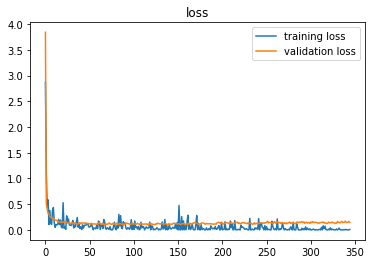

Plotting metrics...


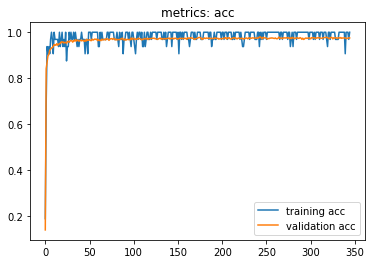

train {'acc': 0.98996365}
test {'acc': 0.9748}
{'acc': 0.9748}


In [8]:
if try_cls2:
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)
    print(test_metric)

In [9]:
# plot and show sample
if try_cls2 and False:
    n_samples = 6
    round_show = 4
    X_show = X_train
    n_data = X_show.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_show[[indices[i]]]
        label = y_train[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = teacher.predict(sample)
        pred_t = teacher.predict_softened(sample, temperature=temperature)
        pred_t2 = y_train_soft[indices[i]]
        print('sample.max()',sample.max())
        print('label',label)
        print('teacher.predict',np.round(pred,round_show))
        print('teacher.predict_softened',np.round(pred_t,round_show))
        print('y_soft',np.round(pred_t2,round_show))
        #     teacher.predict()

In [10]:
import gc
gc.collect()
if try_cls2:
    small = build_small_model(input_dims, output_dims, session, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=20
        ,display_steps=100)

Epoch 1 , step 0 , loss= 2.3005888 val_loss= 2.3102453 , acc = 0.0625 val acc = 0.0732 
Epoch 1 , step 100 , loss= 1.7855613 val_loss= 1.6551838 , acc = 0.5 val acc = 0.542 
Epoch 1 , step 200 , loss= 0.93880785 val_loss= 0.98375255 , acc = 0.78125 val acc = 0.7606 
Epoch 1 , step 300 , loss= 0.5415752 val_loss= 0.70766854 , acc = 0.875 val acc = 0.827 
Epoch 1 , step 400 , loss= 0.5019128 val_loss= 0.5823225 , acc = 0.8125 val acc = 0.8424 
Epoch 1 , step 500 , loss= 0.46483335 val_loss= 0.5190583 , acc = 0.90625 val acc = 0.8614 
Epoch 1 , step 600 , loss= 0.568956 val_loss= 0.46400133 , acc = 0.8125 val acc = 0.882 
Epoch 1 , step 700 , loss= 0.5978286 val_loss= 0.42913765 , acc = 0.8125 val acc = 0.8832 
Epoch 1 , step 800 , loss= 0.44131994 val_loss= 0.40660125 , acc = 0.84375 val acc = 0.8882 
Epoch 1 , step 900 , loss= 0.25838292 val_loss= 0.3877963 , acc = 0.9375 val acc = 0.8954 
Epoch 1 , step 1000 , loss= 0.19970873 val_loss= 0.37352967 , acc = 0.96875 val acc = 0.8972 
Epoc

Epoch 6 , step 310 , loss= 0.2510739 val_loss= 0.24995269 , acc = 0.9375 val acc = 0.9302 
Epoch 6 , step 410 , loss= 0.43361318 val_loss= 0.25452688 , acc = 0.8125 val acc = 0.929 
Epoch 6 , step 510 , loss= 0.3860768 val_loss= 0.25143558 , acc = 0.90625 val acc = 0.928 
Epoch 6 , step 610 , loss= 0.21726716 val_loss= 0.2527765 , acc = 0.875 val acc = 0.929 
Epoch 6 , step 710 , loss= 0.42372337 val_loss= 0.2465847 , acc = 0.84375 val acc = 0.9314 
Epoch 6 , step 810 , loss= 0.19490758 val_loss= 0.24822745 , acc = 0.9375 val acc = 0.9312 
Epoch 6 , step 910 , loss= 0.27228445 val_loss= 0.24928655 , acc = 0.9375 val acc = 0.93 
Epoch 6 , step 1010 , loss= 0.22176115 val_loss= 0.24785066 , acc = 0.9375 val acc = 0.9274 
Epoch 6 , step 1110 , loss= 0.25256264 val_loss= 0.2501268 , acc = 0.9375 val acc = 0.9276 
Epoch 6 , step 1210 , loss= 0.14102468 val_loss= 0.246439 , acc = 0.9375 val acc = 0.9308 
Epoch 6 , step 1310 , loss= 0.10442948 val_loss= 0.2505348 , acc = 1.0 val acc = 0.9276 

Epoch 11 , step 620 , loss= 0.16897689 val_loss= 0.24118355 , acc = 0.96875 val acc = 0.9324 
Epoch 11 , step 720 , loss= 0.078839876 val_loss= 0.23865315 , acc = 0.96875 val acc = 0.9328 
Epoch 11 , step 820 , loss= 0.12567931 val_loss= 0.23406255 , acc = 0.96875 val acc = 0.9342 
Epoch 11 , step 920 , loss= 0.08365837 val_loss= 0.23784356 , acc = 0.96875 val acc = 0.9314 
Epoch 11 , step 1020 , loss= 0.2897156 val_loss= 0.2372269 , acc = 0.9375 val acc = 0.9332 
Epoch 11 , step 1120 , loss= 0.19152047 val_loss= 0.24240293 , acc = 0.9375 val acc = 0.9344 
Epoch 11 , step 1220 , loss= 0.10125649 val_loss= 0.23927337 , acc = 0.96875 val acc = 0.9314 
Epoch 11 , step 1320 , loss= 0.17468339 val_loss= 0.23990223 , acc = 0.9375 val acc = 0.9292 
Epoch 11 , step 1420 , loss= 0.25204855 val_loss= 0.2370845 , acc = 0.9375 val acc = 0.9336 
Epoch 11 , step 1520 , loss= 0.074689 val_loss= 0.23526028 , acc = 0.96875 val acc = 0.9346 
Epoch 11 , step 1620 , loss= 0.46574152 val_loss= 0.23387854 ,

Epoch 16 , step 830 , loss= 0.12319035 val_loss= 0.23368548 , acc = 0.96875 val acc = 0.9346 
Epoch 16 , step 930 , loss= 0.11675586 val_loss= 0.2317973 , acc = 0.9375 val acc = 0.9346 
Epoch 16 , step 1030 , loss= 0.10380856 val_loss= 0.23461735 , acc = 0.96875 val acc = 0.9316 
Epoch 16 , step 1130 , loss= 0.19909084 val_loss= 0.23449461 , acc = 0.9375 val acc = 0.933 
Epoch 16 , step 1230 , loss= 0.10873396 val_loss= 0.23272754 , acc = 0.96875 val acc = 0.9352 
Epoch 16 , step 1330 , loss= 0.26988274 val_loss= 0.23520459 , acc = 0.90625 val acc = 0.9318 
Epoch 16 , step 1430 , loss= 0.19144322 val_loss= 0.24002545 , acc = 0.9375 val acc = 0.933 
Epoch 16 , step 1530 , loss= 0.08888427 val_loss= 0.22999656 , acc = 1.0 val acc = 0.9368 
Epoch 16 , step 1630 , loss= 0.059974417 val_loss= 0.22834964 , acc = 1.0 val acc = 0.9368 
Epoch 17 , step 12 , loss= 0.33740804 val_loss= 0.23156472 , acc = 0.90625 val acc = 0.9366 
Epoch 17 , step 112 , loss= 0.3047738 val_loss= 0.23074418 , acc = 

Plotting loss...


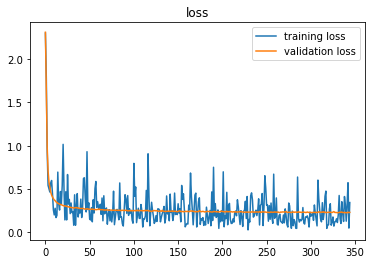

Plotting metrics...


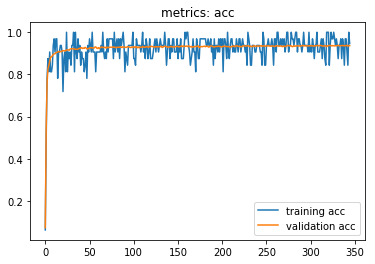

train {'acc': 0.93923634}
test {'acc': 0.9298}


In [11]:
if try_cls2:
    print('Small model')
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

Training student with temperature = 2 , coef = 1 .
Epoch 1 , step 0 , loss= 4.636204 val_loss= 4.6065655 , acc = 0.0625 val acc = 0.0822 
Epoch 1 , step 100 , loss= 3.9788463 val_loss= 3.9661453 , acc = 0.5 val acc = 0.5502 
Epoch 1 , step 200 , loss= 3.4192076 val_loss= 3.5301557 , acc = 0.71875 val acc = 0.664 
Epoch 1 , step 300 , loss= 3.3394783 val_loss= 3.3875427 , acc = 0.78125 val acc = 0.7706 
Epoch 1 , step 400 , loss= 3.2962065 val_loss= 3.2795968 , acc = 0.84375 val acc = 0.8292 
Epoch 1 , step 500 , loss= 3.0943384 val_loss= 3.2171628 , acc = 0.9375 val acc = 0.8418 
Epoch 1 , step 600 , loss= 3.1745765 val_loss= 3.1763856 , acc = 0.9375 val acc = 0.8598 
Epoch 1 , step 700 , loss= 3.4511452 val_loss= 3.152669 , acc = 0.75 val acc = 0.8678 
Epoch 1 , step 800 , loss= 3.103132 val_loss= 3.1351545 , acc = 0.90625 val acc = 0.878 
Epoch 1 , step 900 , loss= 3.009006 val_loss= 3.1169176 , acc = 0.96875 val acc = 0.8844 
Epoch 1 , step 1000 , loss= 3.2389574 val_loss= 3.1042814

Epoch 6 , step 410 , loss= 3.129665 val_loss= 2.984983 , acc = 0.78125 val acc = 0.9056 
Epoch 6 , step 510 , loss= 3.0579238 val_loss= 2.9861045 , acc = 0.9375 val acc = 0.9088 
Epoch 6 , step 610 , loss= 2.8889189 val_loss= 2.9838703 , acc = 0.9375 val acc = 0.907 
Epoch 6 , step 710 , loss= 2.893669 val_loss= 2.9888523 , acc = 0.96875 val acc = 0.9078 
Epoch 6 , step 810 , loss= 2.863902 val_loss= 2.983451 , acc = 0.9375 val acc = 0.9112 
Epoch 6 , step 910 , loss= 2.9706917 val_loss= 2.9850159 , acc = 0.96875 val acc = 0.9092 
Epoch 6 , step 1010 , loss= 3.0451353 val_loss= 2.982535 , acc = 0.875 val acc = 0.9086 
Epoch 6 , step 1110 , loss= 3.0938308 val_loss= 2.9859958 , acc = 0.84375 val acc = 0.9084 
Epoch 6 , step 1210 , loss= 3.1898515 val_loss= 2.9868197 , acc = 0.84375 val acc = 0.913 
Epoch 6 , step 1310 , loss= 3.1580248 val_loss= 2.981787 , acc = 0.8125 val acc = 0.9084 
Epoch 6 , step 1410 , loss= 3.0217657 val_loss= 2.982657 , acc = 0.9375 val acc = 0.9102 
Epoch 6 , s

Epoch 11 , step 920 , loss= 2.8805153 val_loss= 2.9690452 , acc = 0.9375 val acc = 0.9158 
Epoch 11 , step 1020 , loss= 3.324132 val_loss= 2.9717765 , acc = 0.84375 val acc = 0.9136 
Epoch 11 , step 1120 , loss= 2.9498842 val_loss= 2.968793 , acc = 0.9375 val acc = 0.9112 
Epoch 11 , step 1220 , loss= 2.9797974 val_loss= 2.9746923 , acc = 0.9375 val acc = 0.9134 
Epoch 11 , step 1320 , loss= 2.8488884 val_loss= 2.9673786 , acc = 0.9375 val acc = 0.9128 
Epoch 11 , step 1420 , loss= 2.9749205 val_loss= 2.9712877 , acc = 0.90625 val acc = 0.9168 
Epoch 11 , step 1520 , loss= 3.0105348 val_loss= 2.9721978 , acc = 0.9375 val acc = 0.914 
Epoch 11 , step 1620 , loss= 2.9568822 val_loss= 2.966689 , acc = 0.90625 val acc = 0.9126 
Epoch 12 , step 2 , loss= 2.952549 val_loss= 2.9674428 , acc = 0.90625 val acc = 0.9148 
Epoch 12 , step 102 , loss= 3.1274393 val_loss= 2.966794 , acc = 0.84375 val acc = 0.916 
Epoch 12 , step 202 , loss= 2.9500172 val_loss= 2.9684877 , acc = 0.90625 val acc = 0.9

Epoch 16 , step 1330 , loss= 2.9819376 val_loss= 2.9632497 , acc = 0.875 val acc = 0.9112 
Epoch 16 , step 1430 , loss= 2.9788482 val_loss= 2.964099 , acc = 0.9375 val acc = 0.9142 
Epoch 16 , step 1530 , loss= 2.8860278 val_loss= 2.964874 , acc = 0.90625 val acc = 0.914 
Epoch 16 , step 1630 , loss= 3.0199502 val_loss= 2.9661126 , acc = 0.9375 val acc = 0.9156 
Epoch 17 , step 12 , loss= 2.9995742 val_loss= 2.9667783 , acc = 0.9375 val acc = 0.916 
Epoch 17 , step 112 , loss= 2.798811 val_loss= 2.9669156 , acc = 1.0 val acc = 0.918 
Epoch 17 , step 212 , loss= 3.0502088 val_loss= 2.9665074 , acc = 0.875 val acc = 0.9114 
Epoch 17 , step 312 , loss= 2.9462285 val_loss= 2.9651852 , acc = 0.9375 val acc = 0.9126 
Epoch 17 , step 412 , loss= 2.905332 val_loss= 2.962652 , acc = 0.875 val acc = 0.9142 
Epoch 17 , step 512 , loss= 2.788344 val_loss= 2.9635868 , acc = 0.96875 val acc = 0.913 
Epoch 17 , step 612 , loss= 3.013098 val_loss= 2.9643981 , acc = 0.875 val acc = 0.9152 
Epoch 17 , s

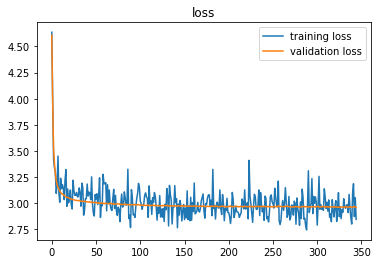

Plotting metrics...


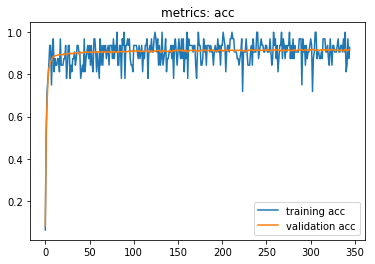

train {'acc': 0.9222}
test {'acc': 0.9199}

Training student with temperature = 2 , coef = 4 .
Epoch 1 , step 0 , loss= 11.587192 val_loss= 11.574535 , acc = 0.125 val acc = 0.0874 
Epoch 1 , step 100 , loss= 10.867628 val_loss= 10.842419 , acc = 0.28125 val acc = 0.1902 
Epoch 1 , step 200 , loss= 10.414194 val_loss= 10.460318 , acc = 0.59375 val acc = 0.483 
Epoch 1 , step 300 , loss= 10.407236 val_loss= 10.321946 , acc = 0.4375 val acc = 0.5648 
Epoch 1 , step 400 , loss= 10.241613 val_loss= 10.252485 , acc = 0.59375 val acc = 0.637 
Epoch 1 , step 500 , loss= 10.144058 val_loss= 10.198817 , acc = 0.625 val acc = 0.6368 
Epoch 1 , step 600 , loss= 10.024098 val_loss= 10.173073 , acc = 0.65625 val acc = 0.6722 
Epoch 1 , step 700 , loss= 10.075586 val_loss= 10.143735 , acc = 0.65625 val acc = 0.6932 
Epoch 1 , step 800 , loss= 10.246222 val_loss= 10.126502 , acc = 0.625 val acc = 0.6914 
Epoch 1 , step 900 , loss= 10.369232 val_loss= 10.110587 , acc = 0.625 val acc = 0.7028 
Epoch 1 

Epoch 6 , step 510 , loss= 9.872831 val_loss= 9.961127 , acc = 0.65625 val acc = 0.7508 
Epoch 6 , step 610 , loss= 9.99144 val_loss= 9.95969 , acc = 0.78125 val acc = 0.7958 
Epoch 6 , step 710 , loss= 9.776159 val_loss= 9.95862 , acc = 0.78125 val acc = 0.7938 
Epoch 6 , step 810 , loss= 9.999876 val_loss= 9.959747 , acc = 0.75 val acc = 0.7784 
Epoch 6 , step 910 , loss= 9.953348 val_loss= 9.957911 , acc = 0.8125 val acc = 0.7766 
Epoch 6 , step 1010 , loss= 9.869536 val_loss= 9.956675 , acc = 0.8125 val acc = 0.7952 
Epoch 6 , step 1110 , loss= 10.362509 val_loss= 9.956682 , acc = 0.65625 val acc = 0.7894 
Epoch 6 , step 1210 , loss= 10.136217 val_loss= 9.954972 , acc = 0.875 val acc = 0.8034 
Epoch 6 , step 1310 , loss= 10.247892 val_loss= 9.960467 , acc = 0.8125 val acc = 0.7832 
Epoch 6 , step 1410 , loss= 10.096987 val_loss= 9.958294 , acc = 0.71875 val acc = 0.7892 
Epoch 6 , step 1510 , loss= 9.819965 val_loss= 9.959039 , acc = 0.71875 val acc = 0.7836 
Epoch 6 , step 1610 , 

Epoch 11 , step 1120 , loss= 9.284221 val_loss= 9.951098 , acc = 0.78125 val acc = 0.7934 
Epoch 11 , step 1220 , loss= 10.048902 val_loss= 9.952968 , acc = 0.75 val acc = 0.803 
Epoch 11 , step 1320 , loss= 9.928441 val_loss= 9.950997 , acc = 0.75 val acc = 0.788 
Epoch 11 , step 1420 , loss= 9.900659 val_loss= 9.955212 , acc = 0.6875 val acc = 0.7868 
Epoch 11 , step 1520 , loss= 9.896859 val_loss= 9.9514265 , acc = 0.78125 val acc = 0.7882 
Epoch 11 , step 1620 , loss= 9.860099 val_loss= 9.952464 , acc = 0.78125 val acc = 0.8082 
Epoch 12 , step 2 , loss= 10.080951 val_loss= 9.9506 , acc = 0.71875 val acc = 0.8096 
Epoch 12 , step 102 , loss= 10.112898 val_loss= 9.948967 , acc = 0.78125 val acc = 0.804 
Epoch 12 , step 202 , loss= 10.335094 val_loss= 9.948075 , acc = 0.6875 val acc = 0.7844 
Epoch 12 , step 302 , loss= 9.945872 val_loss= 9.952061 , acc = 0.875 val acc = 0.7962 
Epoch 12 , step 402 , loss= 9.835497 val_loss= 9.954773 , acc = 0.8125 val acc = 0.813 
Epoch 12 , step 50

Epoch 16 , step 1630 , loss= 9.918533 val_loss= 9.947362 , acc = 0.8125 val acc = 0.7986 
Epoch 17 , step 12 , loss= 10.030709 val_loss= 9.946643 , acc = 0.78125 val acc = 0.817 
Epoch 17 , step 112 , loss= 9.881313 val_loss= 9.944991 , acc = 0.8125 val acc = 0.806 
Epoch 17 , step 212 , loss= 10.188599 val_loss= 9.948277 , acc = 0.75 val acc = 0.787 
Epoch 17 , step 312 , loss= 10.101294 val_loss= 9.948319 , acc = 0.78125 val acc = 0.7904 
Epoch 17 , step 412 , loss= 10.248283 val_loss= 9.947374 , acc = 0.75 val acc = 0.8068 
Epoch 17 , step 512 , loss= 9.636976 val_loss= 9.956917 , acc = 0.875 val acc = 0.7974 
Epoch 17 , step 612 , loss= 9.959846 val_loss= 9.947468 , acc = 0.8125 val acc = 0.7972 
Epoch 17 , step 712 , loss= 9.9952 val_loss= 9.945475 , acc = 0.75 val acc = 0.7972 
Epoch 17 , step 812 , loss= 9.8041115 val_loss= 9.950295 , acc = 0.8125 val acc = 0.8134 
Epoch 17 , step 912 , loss= 9.848233 val_loss= 9.951534 , acc = 0.84375 val acc = 0.7882 
Epoch 17 , step 1012 , lo

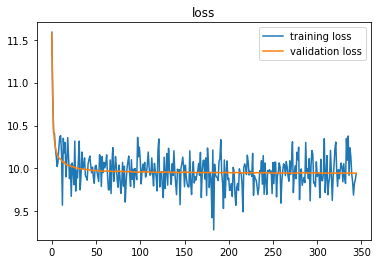

Plotting metrics...


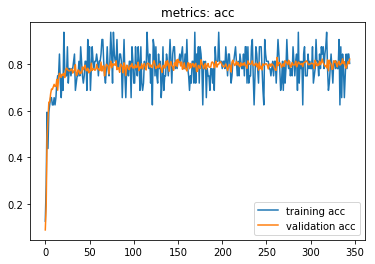

train {'acc': 0.81856364}
test {'acc': 0.8203}

Training student with temperature = 2 , coef = 0.25 .
Epoch 1 , step 0 , loss= 2.849354 val_loss= 2.8682468 , acc = 0.1875 val acc = 0.143 
Epoch 1 , step 100 , loss= 2.1137414 val_loss= 2.1424673 , acc = 0.6875 val acc = 0.6552 
Epoch 1 , step 200 , loss= 1.6245198 val_loss= 1.6323732 , acc = 0.78125 val acc = 0.7644 
Epoch 1 , step 300 , loss= 1.4544268 val_loss= 1.4349837 , acc = 0.75 val acc = 0.8128 
Epoch 1 , step 400 , loss= 1.2349167 val_loss= 1.3477204 , acc = 0.9375 val acc = 0.8514 
Epoch 1 , step 500 , loss= 1.3566779 val_loss= 1.2984757 , acc = 0.9375 val acc = 0.8624 
Epoch 1 , step 600 , loss= 1.1957474 val_loss= 1.2616472 , acc = 0.875 val acc = 0.8716 
Epoch 1 , step 700 , loss= 1.262385 val_loss= 1.2407405 , acc = 0.9375 val acc = 0.8728 
Epoch 1 , step 800 , loss= 1.1899025 val_loss= 1.2262843 , acc = 0.875 val acc = 0.8778 
Epoch 1 , step 900 , loss= 1.1328244 val_loss= 1.2100747 , acc = 0.9375 val acc = 0.8866 
Epoch 

Epoch 6 , step 410 , loss= 1.2333878 val_loss= 1.0779792 , acc = 0.78125 val acc = 0.922 
Epoch 6 , step 510 , loss= 0.98876965 val_loss= 1.0780876 , acc = 0.9375 val acc = 0.9216 
Epoch 6 , step 610 , loss= 1.0346669 val_loss= 1.0784248 , acc = 0.9375 val acc = 0.9232 
Epoch 6 , step 710 , loss= 0.9967002 val_loss= 1.0781981 , acc = 0.96875 val acc = 0.9226 
Epoch 6 , step 810 , loss= 1.26065 val_loss= 1.0797988 , acc = 0.90625 val acc = 0.9208 
Epoch 6 , step 910 , loss= 1.1674647 val_loss= 1.0743914 , acc = 0.90625 val acc = 0.9204 
Epoch 6 , step 1010 , loss= 1.0833615 val_loss= 1.0763211 , acc = 0.84375 val acc = 0.9206 
Epoch 6 , step 1110 , loss= 1.2767658 val_loss= 1.0746155 , acc = 0.84375 val acc = 0.9212 
Epoch 6 , step 1210 , loss= 0.9981936 val_loss= 1.0768626 , acc = 0.96875 val acc = 0.9232 
Epoch 6 , step 1310 , loss= 1.071167 val_loss= 1.071745 , acc = 0.9375 val acc = 0.922 
Epoch 6 , step 1410 , loss= 0.913427 val_loss= 1.073256 , acc = 0.96875 val acc = 0.922 
Epoch

Epoch 11 , step 820 , loss= 0.9718737 val_loss= 1.0597899 , acc = 0.9375 val acc = 0.923 
Epoch 11 , step 920 , loss= 1.0320508 val_loss= 1.0600569 , acc = 0.9375 val acc = 0.9226 
Epoch 11 , step 1020 , loss= 1.0476539 val_loss= 1.0618999 , acc = 0.84375 val acc = 0.9234 
Epoch 11 , step 1120 , loss= 1.1436695 val_loss= 1.0603511 , acc = 0.84375 val acc = 0.9236 
Epoch 11 , step 1220 , loss= 1.1022894 val_loss= 1.0651693 , acc = 0.875 val acc = 0.9244 
Epoch 11 , step 1320 , loss= 1.1244924 val_loss= 1.0579243 , acc = 0.9375 val acc = 0.9238 
Epoch 11 , step 1420 , loss= 0.9857216 val_loss= 1.058958 , acc = 0.9375 val acc = 0.9194 
Epoch 11 , step 1520 , loss= 1.1416513 val_loss= 1.0574658 , acc = 0.90625 val acc = 0.9224 
Epoch 11 , step 1620 , loss= 1.4301095 val_loss= 1.0577437 , acc = 0.8125 val acc = 0.9222 
Epoch 12 , step 2 , loss= 1.0809083 val_loss= 1.0592017 , acc = 0.90625 val acc = 0.9252 
Epoch 12 , step 102 , loss= 1.0792184 val_loss= 1.0659404 , acc = 0.84375 val acc = 

Epoch 16 , step 1230 , loss= 0.94153506 val_loss= 1.0518402 , acc = 0.96875 val acc = 0.9216 
Epoch 16 , step 1330 , loss= 0.9676921 val_loss= 1.053874 , acc = 0.9375 val acc = 0.9202 
Epoch 16 , step 1430 , loss= 1.2373624 val_loss= 1.0549161 , acc = 0.9375 val acc = 0.926 
Epoch 16 , step 1530 , loss= 0.9421557 val_loss= 1.0527703 , acc = 0.9375 val acc = 0.924 
Epoch 16 , step 1630 , loss= 0.9899761 val_loss= 1.0538949 , acc = 0.96875 val acc = 0.9232 
Epoch 17 , step 12 , loss= 1.1539643 val_loss= 1.0523612 , acc = 0.90625 val acc = 0.9218 
Epoch 17 , step 112 , loss= 0.9916394 val_loss= 1.0533174 , acc = 0.9375 val acc = 0.922 
Epoch 17 , step 212 , loss= 0.9182343 val_loss= 1.0542296 , acc = 1.0 val acc = 0.923 
Epoch 17 , step 312 , loss= 1.2070117 val_loss= 1.0578643 , acc = 0.9375 val acc = 0.9238 
Epoch 17 , step 412 , loss= 1.1275723 val_loss= 1.0550613 , acc = 0.90625 val acc = 0.9238 
Epoch 17 , step 512 , loss= 1.2328856 val_loss= 1.0544839 , acc = 0.90625 val acc = 0.924

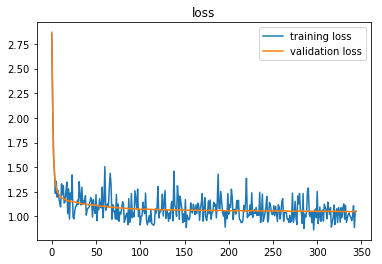

Plotting metrics...


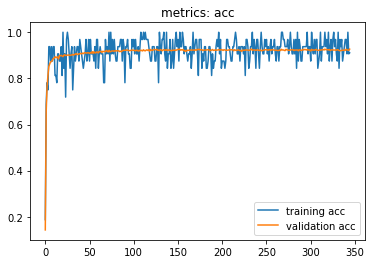

train {'acc': 0.9297818}
test {'acc': 0.9259}

Training student with temperature = 3 , coef = 1 .
Epoch 1 , step 0 , loss= 4.5949345 val_loss= 4.594927 , acc = 0.0625 val acc = 0.148 
Epoch 1 , step 100 , loss= 4.1083694 val_loss= 3.9483576 , acc = 0.375 val acc = 0.4878 
Epoch 1 , step 200 , loss= 3.2046978 val_loss= 3.388655 , acc = 0.9375 val acc = 0.7794 
Epoch 1 , step 300 , loss= 3.336012 val_loss= 3.1874287 , acc = 0.78125 val acc = 0.8178 
Epoch 1 , step 400 , loss= 3.105494 val_loss= 3.097741 , acc = 0.78125 val acc = 0.8426 
Epoch 1 , step 500 , loss= 3.0579877 val_loss= 3.0472796 , acc = 0.84375 val acc = 0.8608 
Epoch 1 , step 600 , loss= 3.182351 val_loss= 3.0063608 , acc = 0.71875 val acc = 0.8726 
Epoch 1 , step 700 , loss= 2.9699554 val_loss= 2.982644 , acc = 0.9375 val acc = 0.8788 
Epoch 1 , step 800 , loss= 3.0714371 val_loss= 2.9614615 , acc = 0.90625 val acc = 0.8832 
Epoch 1 , step 900 , loss= 3.0497062 val_loss= 2.9453437 , acc = 0.8125 val acc = 0.8886 
Epoch 1 

Epoch 6 , step 410 , loss= 2.7751646 val_loss= 2.7918909 , acc = 0.90625 val acc = 0.9156 
Epoch 6 , step 510 , loss= 2.849781 val_loss= 2.7959912 , acc = 0.875 val acc = 0.914 
Epoch 6 , step 610 , loss= 2.7885308 val_loss= 2.7965171 , acc = 0.90625 val acc = 0.912 
Epoch 6 , step 710 , loss= 2.9232898 val_loss= 2.7932606 , acc = 0.90625 val acc = 0.9128 
Epoch 6 , step 810 , loss= 2.9569945 val_loss= 2.7966425 , acc = 0.90625 val acc = 0.9154 
Epoch 6 , step 910 , loss= 2.9351149 val_loss= 2.791718 , acc = 0.875 val acc = 0.915 
Epoch 6 , step 1010 , loss= 2.7616873 val_loss= 2.793885 , acc = 0.96875 val acc = 0.917 
Epoch 6 , step 1110 , loss= 2.7231317 val_loss= 2.7961435 , acc = 0.9375 val acc = 0.912 
Epoch 6 , step 1210 , loss= 2.678348 val_loss= 2.793401 , acc = 0.96875 val acc = 0.9148 
Epoch 6 , step 1310 , loss= 2.7641497 val_loss= 2.7917802 , acc = 0.9375 val acc = 0.9136 
Epoch 6 , step 1410 , loss= 2.9121926 val_loss= 2.79467 , acc = 0.84375 val acc = 0.9174 
Epoch 6 , st

Epoch 11 , step 920 , loss= 2.6266115 val_loss= 2.7793956 , acc = 0.9375 val acc = 0.9174 
Epoch 11 , step 1020 , loss= 2.767151 val_loss= 2.778087 , acc = 0.90625 val acc = 0.9162 
Epoch 11 , step 1120 , loss= 2.7618494 val_loss= 2.7779224 , acc = 0.875 val acc = 0.918 
Epoch 11 , step 1220 , loss= 2.907666 val_loss= 2.7797053 , acc = 0.875 val acc = 0.9164 
Epoch 11 , step 1320 , loss= 2.71938 val_loss= 2.7796407 , acc = 0.96875 val acc = 0.9142 
Epoch 11 , step 1420 , loss= 2.7467234 val_loss= 2.7788827 , acc = 0.9375 val acc = 0.9164 
Epoch 11 , step 1520 , loss= 2.6351564 val_loss= 2.7817793 , acc = 0.9375 val acc = 0.9144 
Epoch 11 , step 1620 , loss= 2.6175625 val_loss= 2.7787075 , acc = 1.0 val acc = 0.9182 
Epoch 12 , step 2 , loss= 2.6593025 val_loss= 2.7778842 , acc = 0.9375 val acc = 0.9154 
Epoch 12 , step 102 , loss= 2.8511314 val_loss= 2.7773628 , acc = 0.8125 val acc = 0.9166 
Epoch 12 , step 202 , loss= 2.6762679 val_loss= 2.7800467 , acc = 0.9375 val acc = 0.9146 
Epo

Epoch 16 , step 1330 , loss= 2.9261403 val_loss= 2.7716916 , acc = 0.875 val acc = 0.9168 
Epoch 16 , step 1430 , loss= 2.6678004 val_loss= 2.773091 , acc = 0.90625 val acc = 0.9166 
Epoch 16 , step 1530 , loss= 2.8207011 val_loss= 2.7708735 , acc = 0.90625 val acc = 0.9186 
Epoch 16 , step 1630 , loss= 2.8155022 val_loss= 2.772544 , acc = 0.875 val acc = 0.9154 
Epoch 17 , step 12 , loss= 2.832867 val_loss= 2.7707496 , acc = 0.9375 val acc = 0.9154 
Epoch 17 , step 112 , loss= 2.6165392 val_loss= 2.771942 , acc = 1.0 val acc = 0.9178 
Epoch 17 , step 212 , loss= 2.810424 val_loss= 2.769607 , acc = 0.90625 val acc = 0.9164 
Epoch 17 , step 312 , loss= 2.646838 val_loss= 2.774493 , acc = 0.96875 val acc = 0.9186 
Epoch 17 , step 412 , loss= 2.6106708 val_loss= 2.77553 , acc = 0.9375 val acc = 0.9196 
Epoch 17 , step 512 , loss= 2.783806 val_loss= 2.7712955 , acc = 0.90625 val acc = 0.9196 
Epoch 17 , step 612 , loss= 2.8166971 val_loss= 2.7713444 , acc = 0.90625 val acc = 0.9182 
Epoch 

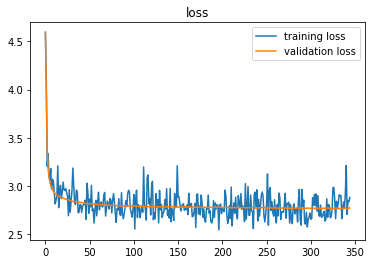

Plotting metrics...


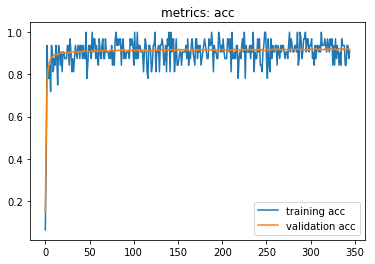

train {'acc': 0.922}
test {'acc': 0.9173}

Training student with temperature = 3 , coef = 9 .
Epoch 1 , step 0 , loss= 23.082346 val_loss= 23.060959 , acc = 0.03125 val acc = 0.0892 
Epoch 1 , step 100 , loss= 22.559465 val_loss= 22.072681 , acc = 0.0625 val acc = 0.0924 
Epoch 1 , step 200 , loss= 21.629896 val_loss= 21.535038 , acc = 0.15625 val acc = 0.1556 
Epoch 1 , step 300 , loss= 21.511637 val_loss= 21.254835 , acc = 0.3125 val acc = 0.3388 
Epoch 1 , step 400 , loss= 20.903788 val_loss= 21.160982 , acc = 0.46875 val acc = 0.487 
Epoch 1 , step 500 , loss= 21.377457 val_loss= 21.120222 , acc = 0.34375 val acc = 0.47 
Epoch 1 , step 600 , loss= 20.851696 val_loss= 21.083584 , acc = 0.5625 val acc = 0.5192 
Epoch 1 , step 700 , loss= 21.25059 val_loss= 21.057547 , acc = 0.4375 val acc = 0.5448 
Epoch 1 , step 800 , loss= 20.690096 val_loss= 21.037941 , acc = 0.53125 val acc = 0.549 
Epoch 1 , step 900 , loss= 20.90885 val_loss= 21.020424 , acc = 0.5 val acc = 0.5432 
Epoch 1 , st

Epoch 6 , step 410 , loss= 20.823904 val_loss= 20.715296 , acc = 0.6875 val acc = 0.7 
Epoch 6 , step 510 , loss= 20.595074 val_loss= 20.71494 , acc = 0.75 val acc = 0.7334 
Epoch 6 , step 610 , loss= 20.57748 val_loss= 20.716957 , acc = 0.78125 val acc = 0.7054 
Epoch 6 , step 710 , loss= 20.960157 val_loss= 20.72215 , acc = 0.65625 val acc = 0.7174 
Epoch 6 , step 810 , loss= 20.476845 val_loss= 20.722803 , acc = 0.75 val acc = 0.6994 
Epoch 6 , step 910 , loss= 20.76509 val_loss= 20.71295 , acc = 0.8125 val acc = 0.7208 
Epoch 6 , step 1010 , loss= 20.514568 val_loss= 20.712345 , acc = 0.6875 val acc = 0.7084 
Epoch 6 , step 1110 , loss= 20.78233 val_loss= 20.712303 , acc = 0.65625 val acc = 0.685 
Epoch 6 , step 1210 , loss= 20.522434 val_loss= 20.715614 , acc = 0.75 val acc = 0.7202 
Epoch 6 , step 1310 , loss= 20.658634 val_loss= 20.714058 , acc = 0.6875 val acc = 0.7134 
Epoch 6 , step 1410 , loss= 21.022135 val_loss= 20.720406 , acc = 0.78125 val acc = 0.738 
Epoch 6 , step 151

Epoch 11 , step 920 , loss= 20.693443 val_loss= 20.705137 , acc = 0.625 val acc = 0.72 
Epoch 11 , step 1020 , loss= 20.53927 val_loss= 20.707788 , acc = 0.78125 val acc = 0.7078 
Epoch 11 , step 1120 , loss= 20.81403 val_loss= 20.705063 , acc = 0.59375 val acc = 0.7004 
Epoch 11 , step 1220 , loss= 20.809458 val_loss= 20.70086 , acc = 0.625 val acc = 0.7172 
Epoch 11 , step 1320 , loss= 20.625896 val_loss= 20.703423 , acc = 0.71875 val acc = 0.7272 
Epoch 11 , step 1420 , loss= 20.94134 val_loss= 20.706732 , acc = 0.8125 val acc = 0.7036 
Epoch 11 , step 1520 , loss= 20.640223 val_loss= 20.70477 , acc = 0.625 val acc = 0.71 
Epoch 11 , step 1620 , loss= 20.616503 val_loss= 20.708757 , acc = 0.75 val acc = 0.7306 
Epoch 12 , step 2 , loss= 20.649021 val_loss= 20.700079 , acc = 0.59375 val acc = 0.7148 
Epoch 12 , step 102 , loss= 20.680141 val_loss= 20.703327 , acc = 0.75 val acc = 0.7238 
Epoch 12 , step 202 , loss= 20.9723 val_loss= 20.703335 , acc = 0.65625 val acc = 0.7256 
Epoch 1

Epoch 16 , step 1330 , loss= 20.318901 val_loss= 20.700869 , acc = 0.78125 val acc = 0.6924 
Epoch 16 , step 1430 , loss= 20.369799 val_loss= 20.695597 , acc = 0.75 val acc = 0.7202 
Epoch 16 , step 1530 , loss= 20.394419 val_loss= 20.706442 , acc = 0.84375 val acc = 0.6972 
Epoch 16 , step 1630 , loss= 20.62746 val_loss= 20.697872 , acc = 0.65625 val acc = 0.7206 
Epoch 17 , step 12 , loss= 20.51956 val_loss= 20.699959 , acc = 0.8125 val acc = 0.6958 
Epoch 17 , step 112 , loss= 20.90728 val_loss= 20.712023 , acc = 0.5625 val acc = 0.7316 
Epoch 17 , step 212 , loss= 21.011843 val_loss= 20.70044 , acc = 0.65625 val acc = 0.7114 
Epoch 17 , step 312 , loss= 20.27372 val_loss= 20.703419 , acc = 0.6875 val acc = 0.6824 
Epoch 17 , step 412 , loss= 20.471605 val_loss= 20.702871 , acc = 0.625 val acc = 0.7152 
Epoch 17 , step 512 , loss= 20.318985 val_loss= 20.700321 , acc = 0.71875 val acc = 0.6938 
Epoch 17 , step 612 , loss= 20.421457 val_loss= 20.697512 , acc = 0.8125 val acc = 0.729 


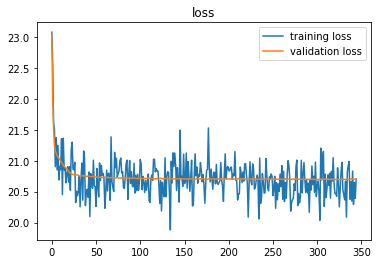

Plotting metrics...


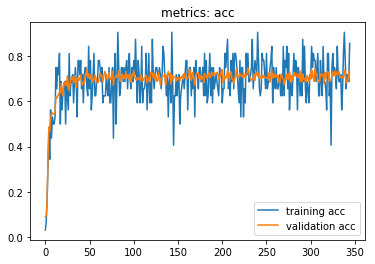

train {'acc': 0.7279636}
test {'acc': 0.728}

Training student with temperature = 3 , coef = 0.1111111111111111 .
Epoch 1 , step 0 , loss= 2.5597973 val_loss= 2.5615757 , acc = 0.09375 val acc = 0.1148 
Epoch 1 , step 100 , loss= 2.025641 val_loss= 1.8958783 , acc = 0.46875 val acc = 0.527 
Epoch 1 , step 200 , loss= 1.2466184 val_loss= 1.2749689 , acc = 0.78125 val acc = 0.7556 
Epoch 1 , step 300 , loss= 0.95482004 val_loss= 1.025726 , acc = 0.875 val acc = 0.8058 
Epoch 1 , step 400 , loss= 1.129195 val_loss= 0.9103811 , acc = 0.71875 val acc = 0.8392 
Epoch 1 , step 500 , loss= 0.8229617 val_loss= 0.84467673 , acc = 0.84375 val acc = 0.8554 
Epoch 1 , step 600 , loss= 0.9638314 val_loss= 0.796656 , acc = 0.8125 val acc = 0.8714 
Epoch 1 , step 700 , loss= 0.9787986 val_loss= 0.7669127 , acc = 0.78125 val acc = 0.8786 
Epoch 1 , step 800 , loss= 0.67271066 val_loss= 0.7451317 , acc = 0.90625 val acc = 0.8864 
Epoch 1 , step 900 , loss= 0.9330711 val_loss= 0.7233314 , acc = 0.84375 v

Epoch 6 , step 310 , loss= 0.6550698 val_loss= 0.59893453 , acc = 0.875 val acc = 0.9242 
Epoch 6 , step 410 , loss= 0.67086846 val_loss= 0.6024759 , acc = 0.875 val acc = 0.922 
Epoch 6 , step 510 , loss= 0.5552753 val_loss= 0.5974802 , acc = 0.90625 val acc = 0.921 
Epoch 6 , step 610 , loss= 0.41752374 val_loss= 0.5965997 , acc = 0.96875 val acc = 0.9214 
Epoch 6 , step 710 , loss= 0.8028014 val_loss= 0.5935307 , acc = 0.875 val acc = 0.9252 
Epoch 6 , step 810 , loss= 0.93912137 val_loss= 0.60176027 , acc = 0.84375 val acc = 0.9216 
Epoch 6 , step 910 , loss= 0.5270154 val_loss= 0.59678376 , acc = 0.9375 val acc = 0.9222 
Epoch 6 , step 1010 , loss= 0.4915676 val_loss= 0.60431194 , acc = 0.96875 val acc = 0.9208 
Epoch 6 , step 1110 , loss= 0.5461707 val_loss= 0.59286153 , acc = 0.96875 val acc = 0.927 
Epoch 6 , step 1210 , loss= 0.6113507 val_loss= 0.59351444 , acc = 0.9375 val acc = 0.926 
Epoch 6 , step 1310 , loss= 0.6018003 val_loss= 0.59277046 , acc = 0.9375 val acc = 0.9266

Epoch 11 , step 720 , loss= 0.4654521 val_loss= 0.5833535 , acc = 0.96875 val acc = 0.9298 
Epoch 11 , step 820 , loss= 0.6537422 val_loss= 0.58618236 , acc = 0.875 val acc = 0.925 
Epoch 11 , step 920 , loss= 0.46889997 val_loss= 0.58531886 , acc = 0.9375 val acc = 0.9262 
Epoch 11 , step 1020 , loss= 0.45764032 val_loss= 0.58268005 , acc = 0.9375 val acc = 0.9272 
Epoch 11 , step 1120 , loss= 0.4997285 val_loss= 0.5835814 , acc = 0.96875 val acc = 0.9268 
Epoch 11 , step 1220 , loss= 0.60857177 val_loss= 0.5824623 , acc = 0.9375 val acc = 0.9272 
Epoch 11 , step 1320 , loss= 0.5407062 val_loss= 0.5857947 , acc = 0.90625 val acc = 0.9266 
Epoch 11 , step 1420 , loss= 0.4403929 val_loss= 0.5856732 , acc = 0.96875 val acc = 0.9256 
Epoch 11 , step 1520 , loss= 0.62402123 val_loss= 0.58180964 , acc = 0.9375 val acc = 0.9286 
Epoch 11 , step 1620 , loss= 0.558217 val_loss= 0.58148754 , acc = 0.90625 val acc = 0.9284 
Epoch 12 , step 2 , loss= 0.5850347 val_loss= 0.5793693 , acc = 0.875 va

Epoch 16 , step 1030 , loss= 0.45039698 val_loss= 0.5768478 , acc = 1.0 val acc = 0.931 
Epoch 16 , step 1130 , loss= 0.5516448 val_loss= 0.5747284 , acc = 0.96875 val acc = 0.9318 
Epoch 16 , step 1230 , loss= 0.6605538 val_loss= 0.57442546 , acc = 0.96875 val acc = 0.9316 
Epoch 16 , step 1330 , loss= 0.61388075 val_loss= 0.5798229 , acc = 0.90625 val acc = 0.9296 
Epoch 16 , step 1430 , loss= 0.48873824 val_loss= 0.5725701 , acc = 0.9375 val acc = 0.9324 
Epoch 16 , step 1530 , loss= 0.5259901 val_loss= 0.5746039 , acc = 0.90625 val acc = 0.9306 
Epoch 16 , step 1630 , loss= 0.88951045 val_loss= 0.57320565 , acc = 0.875 val acc = 0.9336 
Epoch 17 , step 12 , loss= 0.52422214 val_loss= 0.57616055 , acc = 0.96875 val acc = 0.9304 
Epoch 17 , step 112 , loss= 0.749107 val_loss= 0.5749773 , acc = 0.8125 val acc = 0.933 
Epoch 17 , step 212 , loss= 0.52481925 val_loss= 0.578727 , acc = 0.9375 val acc = 0.9296 
Epoch 17 , step 312 , loss= 0.462642 val_loss= 0.5760721 , acc = 0.9375 val ac

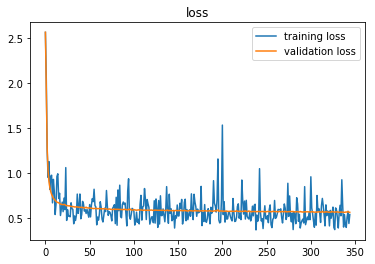

Plotting metrics...


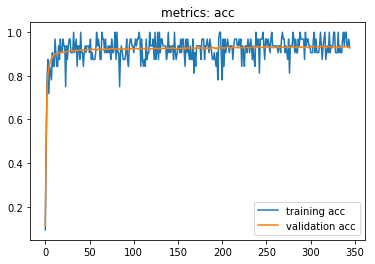

train {'acc': 0.9352546}
test {'acc': 0.9261}

Training student with temperature = 5 , coef = 1 .
Epoch 1 , step 0 , loss= 4.645609 val_loss= 4.616414 , acc = 0.0625 val acc = 0.1032 
Epoch 1 , step 100 , loss= 4.0780563 val_loss= 3.98612 , acc = 0.5 val acc = 0.4738 
Epoch 1 , step 200 , loss= 3.4649558 val_loss= 3.4084873 , acc = 0.65625 val acc = 0.7192 
Epoch 1 , step 300 , loss= 3.2888489 val_loss= 3.1685953 , acc = 0.71875 val acc = 0.7846 
Epoch 1 , step 400 , loss= 3.1904826 val_loss= 3.0668466 , acc = 0.8125 val acc = 0.819 
Epoch 1 , step 500 , loss= 2.9272988 val_loss= 3.0089884 , acc = 0.84375 val acc = 0.839 
Epoch 1 , step 600 , loss= 2.9762177 val_loss= 2.9695601 , acc = 0.8125 val acc = 0.848 
Epoch 1 , step 700 , loss= 2.7956603 val_loss= 2.940175 , acc = 0.90625 val acc = 0.859 
Epoch 1 , step 800 , loss= 2.9387512 val_loss= 2.9058774 , acc = 0.875 val acc = 0.8736 
Epoch 1 , step 900 , loss= 2.8892517 val_loss= 2.8869321 , acc = 0.875 val acc = 0.8806 
Epoch 1 , step

Epoch 6 , step 410 , loss= 2.7492137 val_loss= 2.7159486 , acc = 0.90625 val acc = 0.9228 
Epoch 6 , step 510 , loss= 2.7314515 val_loss= 2.7161374 , acc = 0.9375 val acc = 0.9258 
Epoch 6 , step 610 , loss= 2.838439 val_loss= 2.7147532 , acc = 0.84375 val acc = 0.9266 
Epoch 6 , step 710 , loss= 2.7337463 val_loss= 2.713786 , acc = 0.90625 val acc = 0.9252 
Epoch 6 , step 810 , loss= 2.7249627 val_loss= 2.7171316 , acc = 0.90625 val acc = 0.9234 
Epoch 6 , step 910 , loss= 2.7098641 val_loss= 2.711344 , acc = 0.90625 val acc = 0.9286 
Epoch 6 , step 1010 , loss= 2.7766953 val_loss= 2.71374 , acc = 0.84375 val acc = 0.9246 
Epoch 6 , step 1110 , loss= 2.5729175 val_loss= 2.7146137 , acc = 1.0 val acc = 0.9238 
Epoch 6 , step 1210 , loss= 2.5405538 val_loss= 2.7111568 , acc = 1.0 val acc = 0.927 
Epoch 6 , step 1310 , loss= 2.7611766 val_loss= 2.7102923 , acc = 0.90625 val acc = 0.9272 
Epoch 6 , step 1410 , loss= 2.9030557 val_loss= 2.7108247 , acc = 0.8125 val acc = 0.9276 
Epoch 6 , 

Epoch 11 , step 920 , loss= 2.8276954 val_loss= 2.6871998 , acc = 0.875 val acc = 0.9292 
Epoch 11 , step 1020 , loss= 2.7633219 val_loss= 2.691818 , acc = 0.9375 val acc = 0.9278 
Epoch 11 , step 1120 , loss= 2.5925703 val_loss= 2.6915944 , acc = 1.0 val acc = 0.9282 
Epoch 11 , step 1220 , loss= 2.7821856 val_loss= 2.687933 , acc = 0.875 val acc = 0.9262 
Epoch 11 , step 1320 , loss= 2.6966765 val_loss= 2.6877685 , acc = 0.9375 val acc = 0.9276 
Epoch 11 , step 1420 , loss= 2.7926018 val_loss= 2.6925256 , acc = 0.90625 val acc = 0.9278 
Epoch 11 , step 1520 , loss= 2.965936 val_loss= 2.6889265 , acc = 0.84375 val acc = 0.9276 
Epoch 11 , step 1620 , loss= 2.5648744 val_loss= 2.6884007 , acc = 0.9375 val acc = 0.9284 
Epoch 12 , step 2 , loss= 2.8691437 val_loss= 2.6882093 , acc = 0.90625 val acc = 0.9288 
Epoch 12 , step 102 , loss= 2.7060928 val_loss= 2.6862388 , acc = 0.90625 val acc = 0.93 
Epoch 12 , step 202 , loss= 2.5901442 val_loss= 2.6880898 , acc = 1.0 val acc = 0.929 
Epoc

Epoch 16 , step 1330 , loss= 2.569068 val_loss= 2.6813931 , acc = 0.96875 val acc = 0.9266 
Epoch 16 , step 1430 , loss= 2.8974905 val_loss= 2.6799524 , acc = 0.90625 val acc = 0.9296 
Epoch 16 , step 1530 , loss= 2.6644654 val_loss= 2.6796281 , acc = 0.9375 val acc = 0.9288 
Epoch 16 , step 1630 , loss= 2.534085 val_loss= 2.681372 , acc = 0.96875 val acc = 0.9274 
Epoch 17 , step 12 , loss= 2.7817817 val_loss= 2.679546 , acc = 0.9375 val acc = 0.9282 
Epoch 17 , step 112 , loss= 2.5897841 val_loss= 2.679749 , acc = 1.0 val acc = 0.9288 
Epoch 17 , step 212 , loss= 2.7619166 val_loss= 2.6788752 , acc = 0.90625 val acc = 0.9272 
Epoch 17 , step 312 , loss= 2.5894232 val_loss= 2.6793983 , acc = 0.96875 val acc = 0.9272 
Epoch 17 , step 412 , loss= 2.5132637 val_loss= 2.684099 , acc = 1.0 val acc = 0.926 
Epoch 17 , step 512 , loss= 2.7524278 val_loss= 2.6823046 , acc = 0.875 val acc = 0.9288 
Epoch 17 , step 612 , loss= 2.6718082 val_loss= 2.684611 , acc = 0.96875 val acc = 0.9276 
Epoch

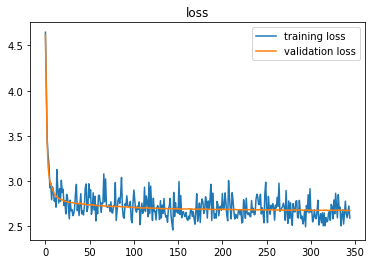

Plotting metrics...


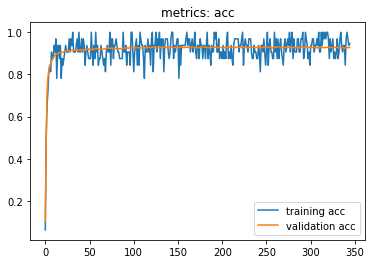

train {'acc': 0.9309273}
test {'acc': 0.9222}

Training student with temperature = 5 , coef = 25 .
Epoch 1 , step 0 , loss= 59.85325 val_loss= 59.888485 , acc = 0.1875 val acc = 0.085 
Epoch 1 , step 100 , loss= 58.764267 val_loss= 58.92 , acc = 0.0625 val acc = 0.0924 
Epoch 1 , step 200 , loss= 58.376915 val_loss= 58.58868 , acc = 0.21875 val acc = 0.151 
Epoch 1 , step 300 , loss= 57.99556 val_loss= 58.228 , acc = 0.28125 val acc = 0.2584 
Epoch 1 , step 400 , loss= 58.377434 val_loss= 58.04986 , acc = 0.28125 val acc = 0.3312 
Epoch 1 , step 500 , loss= 57.731667 val_loss= 57.962563 , acc = 0.5 val acc = 0.4192 
Epoch 1 , step 600 , loss= 57.874413 val_loss= 57.922825 , acc = 0.34375 val acc = 0.424 
Epoch 1 , step 700 , loss= 58.314396 val_loss= 57.881042 , acc = 0.46875 val acc = 0.4986 
Epoch 1 , step 800 , loss= 57.8771 val_loss= 57.85923 , acc = 0.40625 val acc = 0.4768 
Epoch 1 , step 900 , loss= 58.34391 val_loss= 57.83739 , acc = 0.40625 val acc = 0.4792 
Epoch 1 , step 100

Epoch 6 , step 510 , loss= 57.428852 val_loss= 57.653267 , acc = 0.6875 val acc = 0.6194 
Epoch 6 , step 610 , loss= 58.06679 val_loss= 57.656574 , acc = 0.6875 val acc = 0.6116 
Epoch 6 , step 710 , loss= 57.816914 val_loss= 57.65262 , acc = 0.59375 val acc = 0.6356 
Epoch 6 , step 810 , loss= 58.060642 val_loss= 57.65176 , acc = 0.6875 val acc = 0.6378 
Epoch 6 , step 910 , loss= 57.288853 val_loss= 57.655327 , acc = 0.625 val acc = 0.5928 
Epoch 6 , step 1010 , loss= 57.621197 val_loss= 57.65819 , acc = 0.84375 val acc = 0.6252 
Epoch 6 , step 1110 , loss= 58.034714 val_loss= 57.65875 , acc = 0.5625 val acc = 0.581 
Epoch 6 , step 1210 , loss= 57.650497 val_loss= 57.652237 , acc = 0.5625 val acc = 0.6044 
Epoch 6 , step 1310 , loss= 57.66993 val_loss= 57.66175 , acc = 0.59375 val acc = 0.5898 
Epoch 6 , step 1410 , loss= 57.79655 val_loss= 57.662235 , acc = 0.75 val acc = 0.5962 
Epoch 6 , step 1510 , loss= 57.93239 val_loss= 57.65901 , acc = 0.5625 val acc = 0.6114 
Epoch 6 , step 

Epoch 11 , step 1020 , loss= 57.615685 val_loss= 57.640392 , acc = 0.6875 val acc = 0.6106 
Epoch 11 , step 1120 , loss= 57.921543 val_loss= 57.640717 , acc = 0.46875 val acc = 0.6056 
Epoch 11 , step 1220 , loss= 57.6433 val_loss= 57.642586 , acc = 0.625 val acc = 0.6072 
Epoch 11 , step 1320 , loss= 57.52602 val_loss= 57.64517 , acc = 0.71875 val acc = 0.6536 
Epoch 11 , step 1420 , loss= 57.490677 val_loss= 57.638863 , acc = 0.4375 val acc = 0.6152 
Epoch 11 , step 1520 , loss= 57.589497 val_loss= 57.641045 , acc = 0.6875 val acc = 0.6286 
Epoch 11 , step 1620 , loss= 57.489513 val_loss= 57.6402 , acc = 0.5 val acc = 0.6114 
Epoch 12 , step 2 , loss= 57.275085 val_loss= 57.647583 , acc = 0.34375 val acc = 0.5556 
Epoch 12 , step 102 , loss= 57.43497 val_loss= 57.6342 , acc = 0.65625 val acc = 0.6048 
Epoch 12 , step 202 , loss= 57.554413 val_loss= 57.635788 , acc = 0.4375 val acc = 0.625 
Epoch 12 , step 302 , loss= 57.541668 val_loss= 57.641476 , acc = 0.65625 val acc = 0.6102 
Epo

Epoch 16 , step 1430 , loss= 57.581223 val_loss= 57.629528 , acc = 0.5 val acc = 0.626 
Epoch 16 , step 1530 , loss= 57.67339 val_loss= 57.62936 , acc = 0.78125 val acc = 0.6028 
Epoch 16 , step 1630 , loss= 57.940712 val_loss= 57.639935 , acc = 0.5625 val acc = 0.613 
Epoch 17 , step 12 , loss= 57.26147 val_loss= 57.627876 , acc = 0.65625 val acc = 0.6374 
Epoch 17 , step 112 , loss= 57.98222 val_loss= 57.632793 , acc = 0.53125 val acc = 0.6698 
Epoch 17 , step 212 , loss= 57.74688 val_loss= 57.63183 , acc = 0.71875 val acc = 0.6154 
Epoch 17 , step 312 , loss= 57.43241 val_loss= 57.62847 , acc = 0.5 val acc = 0.62 
Epoch 17 , step 412 , loss= 58.05147 val_loss= 57.62793 , acc = 0.625 val acc = 0.635 
Epoch 17 , step 512 , loss= 57.470882 val_loss= 57.630707 , acc = 0.75 val acc = 0.6424 
Epoch 17 , step 612 , loss= 56.99032 val_loss= 57.63002 , acc = 0.6875 val acc = 0.5998 
Epoch 17 , step 712 , loss= 57.311684 val_loss= 57.628563 , acc = 0.6875 val acc = 0.6594 
Epoch 17 , step 812

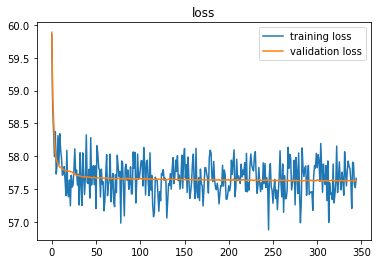

Plotting metrics...


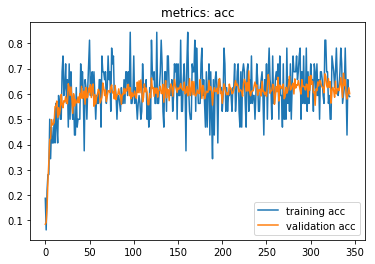

train {'acc': 0.606}
test {'acc': 0.6002}

Training student with temperature = 5 , coef = 0.04 .
Epoch 1 , step 0 , loss= 2.4594123 val_loss= 2.4002192 , acc = 0.03125 val acc = 0.1044 
Epoch 1 , step 100 , loss= 1.8352934 val_loss= 1.7765837 , acc = 0.46875 val acc = 0.5628 
Epoch 1 , step 200 , loss= 1.0607337 val_loss= 1.1047239 , acc = 0.75 val acc = 0.7492 
Epoch 1 , step 300 , loss= 0.7359824 val_loss= 0.8362187 , acc = 0.9375 val acc = 0.8146 
Epoch 1 , step 400 , loss= 0.5292909 val_loss= 0.7166758 , acc = 0.875 val acc = 0.8448 
Epoch 1 , step 500 , loss= 0.54328346 val_loss= 0.64025766 , acc = 0.84375 val acc = 0.8586 
Epoch 1 , step 600 , loss= 0.7145478 val_loss= 0.59437925 , acc = 0.8125 val acc = 0.8674 
Epoch 1 , step 700 , loss= 0.75648123 val_loss= 0.5577123 , acc = 0.84375 val acc = 0.877 
Epoch 1 , step 800 , loss= 0.38404876 val_loss= 0.5381821 , acc = 0.9375 val acc = 0.8824 
Epoch 1 , step 900 , loss= 0.4551008 val_loss= 0.51735455 , acc = 0.90625 val acc = 0.8906

Epoch 6 , step 210 , loss= 0.3140281 val_loss= 0.37014306 , acc = 0.9375 val acc = 0.9264 
Epoch 6 , step 310 , loss= 0.4063037 val_loss= 0.3733768 , acc = 0.90625 val acc = 0.9242 
Epoch 6 , step 410 , loss= 0.30655113 val_loss= 0.37063575 , acc = 0.90625 val acc = 0.9298 
Epoch 6 , step 510 , loss= 0.41462252 val_loss= 0.3727935 , acc = 0.90625 val acc = 0.9262 
Epoch 6 , step 610 , loss= 0.18701941 val_loss= 0.3715828 , acc = 1.0 val acc = 0.9276 
Epoch 6 , step 710 , loss= 0.26046562 val_loss= 0.37117118 , acc = 0.96875 val acc = 0.9294 
Epoch 6 , step 810 , loss= 0.50926405 val_loss= 0.37098834 , acc = 0.875 val acc = 0.929 
Epoch 6 , step 910 , loss= 0.40965214 val_loss= 0.3730662 , acc = 0.84375 val acc = 0.9244 
Epoch 6 , step 1010 , loss= 0.22764641 val_loss= 0.36901665 , acc = 0.9375 val acc = 0.9268 
Epoch 6 , step 1110 , loss= 0.18946072 val_loss= 0.3714639 , acc = 1.0 val acc = 0.927 
Epoch 6 , step 1210 , loss= 0.3065462 val_loss= 0.36766115 , acc = 0.9375 val acc = 0.929

Epoch 11 , step 520 , loss= 0.63186264 val_loss= 0.36628556 , acc = 0.90625 val acc = 0.9312 
Epoch 11 , step 620 , loss= 0.69982374 val_loss= 0.3638219 , acc = 0.9375 val acc = 0.9304 
Epoch 11 , step 720 , loss= 0.34071276 val_loss= 0.3628302 , acc = 0.9375 val acc = 0.932 
Epoch 11 , step 820 , loss= 0.5455081 val_loss= 0.36310327 , acc = 0.90625 val acc = 0.932 
Epoch 11 , step 920 , loss= 0.46183932 val_loss= 0.36376616 , acc = 0.875 val acc = 0.931 
Epoch 11 , step 1020 , loss= 0.22971639 val_loss= 0.36123037 , acc = 0.9375 val acc = 0.9302 
Epoch 11 , step 1120 , loss= 0.30705917 val_loss= 0.36151442 , acc = 0.90625 val acc = 0.9314 
Epoch 11 , step 1220 , loss= 0.2613577 val_loss= 0.3655524 , acc = 0.96875 val acc = 0.9288 
Epoch 11 , step 1320 , loss= 0.264875 val_loss= 0.36064878 , acc = 0.9375 val acc = 0.9294 
Epoch 11 , step 1420 , loss= 0.24053529 val_loss= 0.3621381 , acc = 0.96875 val acc = 0.9296 
Epoch 11 , step 1520 , loss= 0.37473738 val_loss= 0.36852062 , acc = 0.9

Epoch 16 , step 730 , loss= 0.27435857 val_loss= 0.36262345 , acc = 0.96875 val acc = 0.9278 
Epoch 16 , step 830 , loss= 0.36291304 val_loss= 0.3623055 , acc = 0.9375 val acc = 0.9278 
Epoch 16 , step 930 , loss= 0.46821883 val_loss= 0.3583764 , acc = 0.84375 val acc = 0.9312 
Epoch 16 , step 1030 , loss= 0.353598 val_loss= 0.36349156 , acc = 0.9375 val acc = 0.9316 
Epoch 16 , step 1130 , loss= 0.24035577 val_loss= 0.3669213 , acc = 0.9375 val acc = 0.9286 
Epoch 16 , step 1230 , loss= 0.3885735 val_loss= 0.3650428 , acc = 0.90625 val acc = 0.9284 
Epoch 16 , step 1330 , loss= 0.5937772 val_loss= 0.36470073 , acc = 0.9375 val acc = 0.9288 
Epoch 16 , step 1430 , loss= 0.20949857 val_loss= 0.36496234 , acc = 1.0 val acc = 0.9276 
Epoch 16 , step 1530 , loss= 0.34662077 val_loss= 0.3693248 , acc = 0.9375 val acc = 0.9286 
Epoch 16 , step 1630 , loss= 0.38223875 val_loss= 0.36527252 , acc = 0.90625 val acc = 0.9292 
Epoch 17 , step 12 , loss= 0.28845304 val_loss= 0.36383072 , acc = 0.93

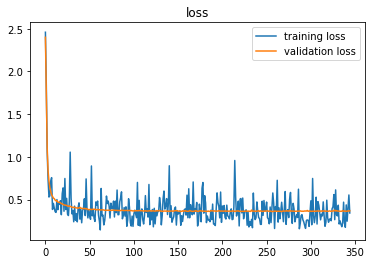

Plotting metrics...


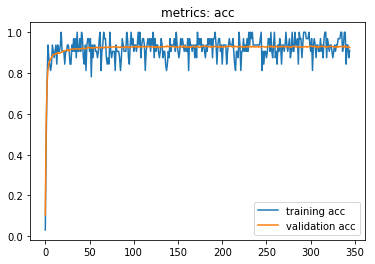

train {'acc': 0.93430907}
test {'acc': 0.9239}

Training student with temperature = 10 , coef = 1 .
Epoch 1 , step 0 , loss= 4.614529 val_loss= 4.63422 , acc = 0.09375 val acc = 0.0744 
Epoch 1 , step 100 , loss= 4.222015 val_loss= 4.2865295 , acc = 0.46875 val acc = 0.3986 
Epoch 1 , step 200 , loss= 3.752738 val_loss= 3.69203 , acc = 0.59375 val acc = 0.5936 
Epoch 1 , step 300 , loss= 2.9507113 val_loss= 3.1888342 , acc = 0.875 val acc = 0.7802 
Epoch 1 , step 400 , loss= 2.9629877 val_loss= 2.9449697 , acc = 0.75 val acc = 0.8382 
Epoch 1 , step 500 , loss= 2.854693 val_loss= 2.8574386 , acc = 0.8125 val acc = 0.8638 
Epoch 1 , step 600 , loss= 2.7533596 val_loss= 2.816968 , acc = 0.84375 val acc = 0.8724 
Epoch 1 , step 700 , loss= 2.7353592 val_loss= 2.7866766 , acc = 0.90625 val acc = 0.8818 
Epoch 1 , step 800 , loss= 2.8563952 val_loss= 2.7696815 , acc = 0.84375 val acc = 0.8848 
Epoch 1 , step 900 , loss= 2.5742218 val_loss= 2.7560656 , acc = 0.9375 val acc = 0.8876 
Epoch 1 

Epoch 6 , step 410 , loss= 2.5859983 val_loss= 2.6377106 , acc = 0.9375 val acc = 0.9242 
Epoch 6 , step 510 , loss= 2.5955608 val_loss= 2.6471677 , acc = 0.9375 val acc = 0.9194 
Epoch 6 , step 610 , loss= 2.5939841 val_loss= 2.6375196 , acc = 0.9375 val acc = 0.9222 
Epoch 6 , step 710 , loss= 2.7961981 val_loss= 2.6370387 , acc = 0.875 val acc = 0.9216 
Epoch 6 , step 810 , loss= 2.489762 val_loss= 2.6400628 , acc = 1.0 val acc = 0.921 
Epoch 6 , step 910 , loss= 2.6838293 val_loss= 2.637467 , acc = 0.90625 val acc = 0.9234 
Epoch 6 , step 1010 , loss= 2.56878 val_loss= 2.6467712 , acc = 0.96875 val acc = 0.918 
Epoch 6 , step 1110 , loss= 2.6788492 val_loss= 2.6392744 , acc = 0.9375 val acc = 0.9228 
Epoch 6 , step 1210 , loss= 2.5330408 val_loss= 2.6446989 , acc = 0.9375 val acc = 0.9166 
Epoch 6 , step 1310 , loss= 2.4812999 val_loss= 2.6341424 , acc = 0.96875 val acc = 0.924 
Epoch 6 , step 1410 , loss= 2.5571358 val_loss= 2.6384685 , acc = 0.90625 val acc = 0.921 
Epoch 6 , ste

Epoch 11 , step 920 , loss= 2.5992916 val_loss= 2.6302903 , acc = 0.90625 val acc = 0.9228 
Epoch 11 , step 1020 , loss= 2.4541078 val_loss= 2.6320586 , acc = 0.96875 val acc = 0.9208 
Epoch 11 , step 1120 , loss= 2.7238846 val_loss= 2.6396468 , acc = 0.9375 val acc = 0.9184 
Epoch 11 , step 1220 , loss= 2.5072925 val_loss= 2.6308756 , acc = 0.9375 val acc = 0.9234 
Epoch 11 , step 1320 , loss= 2.586805 val_loss= 2.6301982 , acc = 0.90625 val acc = 0.9228 
Epoch 11 , step 1420 , loss= 2.64383 val_loss= 2.6292975 , acc = 0.90625 val acc = 0.9238 
Epoch 11 , step 1520 , loss= 2.5982308 val_loss= 2.6299548 , acc = 0.96875 val acc = 0.9212 
Epoch 11 , step 1620 , loss= 2.5455873 val_loss= 2.6299071 , acc = 0.90625 val acc = 0.9232 
Epoch 12 , step 2 , loss= 2.4620793 val_loss= 2.6313527 , acc = 1.0 val acc = 0.92 
Epoch 12 , step 102 , loss= 2.7653112 val_loss= 2.6358922 , acc = 0.84375 val acc = 0.922 
Epoch 12 , step 202 , loss= 2.5798433 val_loss= 2.6315143 , acc = 0.90625 val acc = 0.9

Epoch 16 , step 1330 , loss= 2.549306 val_loss= 2.6278853 , acc = 0.9375 val acc = 0.9224 
Epoch 16 , step 1430 , loss= 2.6269724 val_loss= 2.6255639 , acc = 0.9375 val acc = 0.924 
Epoch 16 , step 1530 , loss= 2.649164 val_loss= 2.632381 , acc = 0.84375 val acc = 0.9196 
Epoch 16 , step 1630 , loss= 2.694362 val_loss= 2.6281898 , acc = 0.90625 val acc = 0.9232 
Epoch 17 , step 12 , loss= 2.5215204 val_loss= 2.6272848 , acc = 0.9375 val acc = 0.9242 
Epoch 17 , step 112 , loss= 2.432256 val_loss= 2.6278148 , acc = 1.0 val acc = 0.9232 
Epoch 17 , step 212 , loss= 2.754231 val_loss= 2.628104 , acc = 0.875 val acc = 0.9232 
Epoch 17 , step 312 , loss= 2.7156014 val_loss= 2.6298044 , acc = 0.90625 val acc = 0.9236 
Epoch 17 , step 412 , loss= 2.5923662 val_loss= 2.627121 , acc = 0.9375 val acc = 0.9216 
Epoch 17 , step 512 , loss= 2.5773346 val_loss= 2.6339617 , acc = 0.96875 val acc = 0.9192 
Epoch 17 , step 612 , loss= 2.8791232 val_loss= 2.627766 , acc = 0.8125 val acc = 0.9244 
Epoch 

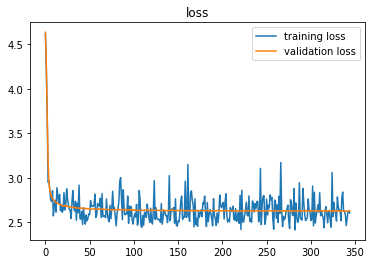

Plotting metrics...


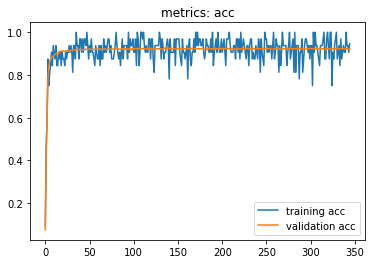

train {'acc': 0.9274727}
test {'acc': 0.9214}

Training student with temperature = 10 , coef = 100 .
Epoch 1 , step 0 , loss= 232.59836 val_loss= 232.5737 , acc = 0.09375 val acc = 0.0702 
Epoch 1 , step 100 , loss= 231.09746 val_loss= 231.45113 , acc = 0.15625 val acc = 0.1252 
Epoch 1 , step 200 , loss= 231.23909 val_loss= 231.11198 , acc = 0.375 val acc = 0.3708 
Epoch 1 , step 300 , loss= 231.00627 val_loss= 230.91534 , acc = 0.40625 val acc = 0.4816 
Epoch 1 , step 400 , loss= 230.98555 val_loss= 230.80008 , acc = 0.53125 val acc = 0.5718 
Epoch 1 , step 500 , loss= 230.66713 val_loss= 230.7334 , acc = 0.71875 val acc = 0.5988 
Epoch 1 , step 600 , loss= 230.43344 val_loss= 230.69862 , acc = 0.5625 val acc = 0.604 
Epoch 1 , step 700 , loss= 230.80722 val_loss= 230.66422 , acc = 0.53125 val acc = 0.6144 
Epoch 1 , step 800 , loss= 230.35745 val_loss= 230.65385 , acc = 0.59375 val acc = 0.6088 
Epoch 1 , step 900 , loss= 230.94666 val_loss= 230.63057 , acc = 0.5 val acc = 0.6102 
E

Epoch 6 , step 410 , loss= 230.834 val_loss= 230.4361 , acc = 0.625 val acc = 0.775 
Epoch 6 , step 510 , loss= 230.81662 val_loss= 230.43648 , acc = 0.71875 val acc = 0.7714 
Epoch 6 , step 610 , loss= 230.36356 val_loss= 230.43462 , acc = 0.71875 val acc = 0.7478 
Epoch 6 , step 710 , loss= 230.50557 val_loss= 230.43257 , acc = 0.78125 val acc = 0.763 
Epoch 6 , step 810 , loss= 230.69615 val_loss= 230.43388 , acc = 0.6875 val acc = 0.762 
Epoch 6 , step 910 , loss= 229.8941 val_loss= 230.42863 , acc = 0.8125 val acc = 0.7502 
Epoch 6 , step 1010 , loss= 230.14276 val_loss= 230.42816 , acc = 0.78125 val acc = 0.7698 
Epoch 6 , step 1110 , loss= 230.39954 val_loss= 230.43517 , acc = 0.75 val acc = 0.7624 
Epoch 6 , step 1210 , loss= 230.6104 val_loss= 230.43105 , acc = 0.71875 val acc = 0.7758 
Epoch 6 , step 1310 , loss= 230.81927 val_loss= 230.43396 , acc = 0.78125 val acc = 0.7412 
Epoch 6 , step 1410 , loss= 230.59286 val_loss= 230.43475 , acc = 0.71875 val acc = 0.725 
Epoch 6 , 

Epoch 11 , step 920 , loss= 230.55417 val_loss= 230.4045 , acc = 0.8125 val acc = 0.7478 
Epoch 11 , step 1020 , loss= 230.73172 val_loss= 230.40477 , acc = 0.71875 val acc = 0.7802 
Epoch 11 , step 1120 , loss= 230.60025 val_loss= 230.40413 , acc = 0.78125 val acc = 0.7278 
Epoch 11 , step 1220 , loss= 230.29561 val_loss= 230.4042 , acc = 0.75 val acc = 0.782 
Epoch 11 , step 1320 , loss= 230.79672 val_loss= 230.40836 , acc = 0.6875 val acc = 0.736 
Epoch 11 , step 1420 , loss= 230.5718 val_loss= 230.40015 , acc = 0.71875 val acc = 0.766 
Epoch 11 , step 1520 , loss= 230.51431 val_loss= 230.40747 , acc = 0.75 val acc = 0.7674 
Epoch 11 , step 1620 , loss= 230.7566 val_loss= 230.40613 , acc = 0.625 val acc = 0.7676 
Epoch 12 , step 2 , loss= 230.56229 val_loss= 230.39935 , acc = 0.8125 val acc = 0.76 
Epoch 12 , step 102 , loss= 230.49628 val_loss= 230.40387 , acc = 0.71875 val acc = 0.7554 
Epoch 12 , step 202 , loss= 229.89903 val_loss= 230.40028 , acc = 0.78125 val acc = 0.7586 
Epo

Epoch 16 , step 1330 , loss= 230.3344 val_loss= 230.392 , acc = 0.78125 val acc = 0.7848 
Epoch 16 , step 1430 , loss= 230.58237 val_loss= 230.39091 , acc = 0.75 val acc = 0.7838 
Epoch 16 , step 1530 , loss= 230.6996 val_loss= 230.39157 , acc = 0.6875 val acc = 0.7518 
Epoch 16 , step 1630 , loss= 230.73355 val_loss= 230.39732 , acc = 0.75 val acc = 0.7696 
Epoch 17 , step 12 , loss= 230.02655 val_loss= 230.396 , acc = 0.875 val acc = 0.776 
Epoch 17 , step 112 , loss= 230.57668 val_loss= 230.38927 , acc = 0.8125 val acc = 0.7394 
Epoch 17 , step 212 , loss= 230.47322 val_loss= 230.3862 , acc = 0.71875 val acc = 0.7774 
Epoch 17 , step 312 , loss= 230.63132 val_loss= 230.39499 , acc = 0.5625 val acc = 0.733 
Epoch 17 , step 412 , loss= 230.45663 val_loss= 230.39336 , acc = 0.8125 val acc = 0.7854 
Epoch 17 , step 512 , loss= 230.56155 val_loss= 230.39941 , acc = 0.75 val acc = 0.7774 
Epoch 17 , step 612 , loss= 230.12523 val_loss= 230.38568 , acc = 0.78125 val acc = 0.7674 
Epoch 17 

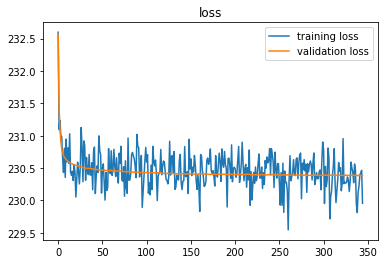

Plotting metrics...


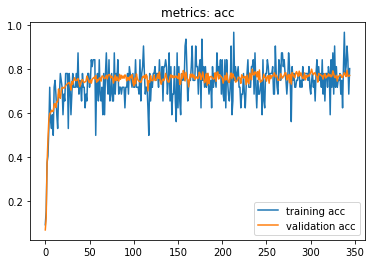

train {'acc': 0.76476365}
test {'acc': 0.7671}

Training student with temperature = 10 , coef = 0.01 .
Epoch 1 , step 0 , loss= 2.3198354 val_loss= 2.357487 , acc = 0.1875 val acc = 0.0674 
Epoch 1 , step 100 , loss= 1.8026363 val_loss= 1.7820559 , acc = 0.5 val acc = 0.5656 
Epoch 1 , step 200 , loss= 1.1278926 val_loss= 1.0844761 , acc = 0.71875 val acc = 0.7392 
Epoch 1 , step 300 , loss= 0.8505998 val_loss= 0.7850242 , acc = 0.6875 val acc = 0.7984 
Epoch 1 , step 400 , loss= 0.45369187 val_loss= 0.6484347 , acc = 0.90625 val acc = 0.8304 
Epoch 1 , step 500 , loss= 0.3671842 val_loss= 0.583051 , acc = 0.96875 val acc = 0.8452 
Epoch 1 , step 600 , loss= 0.8234401 val_loss= 0.5240313 , acc = 0.75 val acc = 0.8622 
Epoch 1 , step 700 , loss= 0.5110165 val_loss= 0.48777974 , acc = 0.9375 val acc = 0.8728 
Epoch 1 , step 800 , loss= 0.4339853 val_loss= 0.46791494 , acc = 0.875 val acc = 0.8768 
Epoch 1 , step 900 , loss= 0.50814563 val_loss= 0.44711277 , acc = 0.875 val acc = 0.8812 


Epoch 6 , step 210 , loss= 0.19812651 val_loss= 0.31055686 , acc = 0.9375 val acc = 0.9216 
Epoch 6 , step 310 , loss= 0.20162946 val_loss= 0.3077075 , acc = 0.875 val acc = 0.9244 
Epoch 6 , step 410 , loss= 0.50898105 val_loss= 0.31384036 , acc = 0.90625 val acc = 0.9222 
Epoch 6 , step 510 , loss= 0.28932232 val_loss= 0.3060077 , acc = 0.9375 val acc = 0.9236 
Epoch 6 , step 610 , loss= 0.5254101 val_loss= 0.3092696 , acc = 0.875 val acc = 0.9226 
Epoch 6 , step 710 , loss= 0.41486353 val_loss= 0.30784297 , acc = 0.96875 val acc = 0.9204 
Epoch 6 , step 810 , loss= 0.30064142 val_loss= 0.31435123 , acc = 0.90625 val acc = 0.9204 
Epoch 6 , step 910 , loss= 0.13385715 val_loss= 0.3049096 , acc = 1.0 val acc = 0.9242 
Epoch 6 , step 1010 , loss= 0.6354464 val_loss= 0.30380473 , acc = 0.90625 val acc = 0.924 
Epoch 6 , step 1110 , loss= 0.22822772 val_loss= 0.30395848 , acc = 0.9375 val acc = 0.922 
Epoch 6 , step 1210 , loss= 0.24114354 val_loss= 0.30949998 , acc = 0.9375 val acc = 0.

Epoch 11 , step 520 , loss= 0.28031033 val_loss= 0.29524362 , acc = 0.96875 val acc = 0.925 
Epoch 11 , step 620 , loss= 0.23544659 val_loss= 0.28919378 , acc = 0.90625 val acc = 0.9248 
Epoch 11 , step 720 , loss= 0.1981789 val_loss= 0.29142272 , acc = 0.90625 val acc = 0.9228 
Epoch 11 , step 820 , loss= 0.16388728 val_loss= 0.2889176 , acc = 0.96875 val acc = 0.9272 
Epoch 11 , step 920 , loss= 0.17262797 val_loss= 0.2945964 , acc = 0.9375 val acc = 0.9232 
Epoch 11 , step 1020 , loss= 0.4143655 val_loss= 0.3003244 , acc = 0.875 val acc = 0.9204 
Epoch 11 , step 1120 , loss= 0.5506617 val_loss= 0.2953523 , acc = 0.84375 val acc = 0.9274 
Epoch 11 , step 1220 , loss= 0.85196006 val_loss= 0.29411355 , acc = 0.875 val acc = 0.9264 
Epoch 11 , step 1320 , loss= 0.33141205 val_loss= 0.2938985 , acc = 0.90625 val acc = 0.9264 
Epoch 11 , step 1420 , loss= 0.3366855 val_loss= 0.28987595 , acc = 0.84375 val acc = 0.9256 
Epoch 11 , step 1520 , loss= 0.27654162 val_loss= 0.29228652 , acc = 0

Epoch 16 , step 730 , loss= 0.36010584 val_loss= 0.28250682 , acc = 0.90625 val acc = 0.9296 
Epoch 16 , step 830 , loss= 0.36137444 val_loss= 0.28086498 , acc = 0.875 val acc = 0.9282 
Epoch 16 , step 930 , loss= 0.4385435 val_loss= 0.2830645 , acc = 0.90625 val acc = 0.9264 
Epoch 16 , step 1030 , loss= 0.13876997 val_loss= 0.2820105 , acc = 0.96875 val acc = 0.9254 
Epoch 16 , step 1130 , loss= 0.26531705 val_loss= 0.2810266 , acc = 0.875 val acc = 0.9266 
Epoch 16 , step 1230 , loss= 0.34206763 val_loss= 0.2804697 , acc = 0.90625 val acc = 0.9294 
Epoch 16 , step 1330 , loss= 0.49646762 val_loss= 0.28096965 , acc = 0.8125 val acc = 0.9266 
Epoch 16 , step 1430 , loss= 0.45233706 val_loss= 0.28417137 , acc = 0.90625 val acc = 0.9264 
Epoch 16 , step 1530 , loss= 0.2302284 val_loss= 0.28640348 , acc = 0.9375 val acc = 0.923 
Epoch 16 , step 1630 , loss= 0.18516989 val_loss= 0.28004462 , acc = 0.96875 val acc = 0.9236 
Epoch 17 , step 12 , loss= 0.25257707 val_loss= 0.2799928 , acc = 

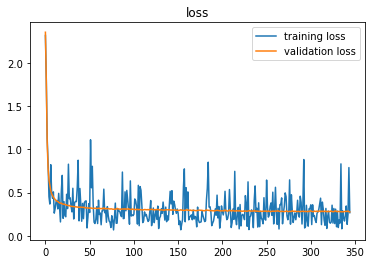

Plotting metrics...


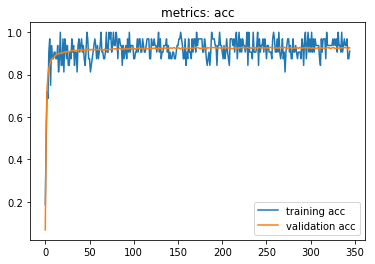

train {'acc': 0.93485457}
test {'acc': 0.9259}

Training student with temperature = 20 , coef = 1 .
Epoch 1 , step 0 , loss= 4.5852156 val_loss= 4.601075 , acc = 0.21875 val acc = 0.1478 
Epoch 1 , step 100 , loss= 3.8641102 val_loss= 3.9454236 , acc = 0.59375 val acc = 0.5434 
Epoch 1 , step 200 , loss= 3.1246786 val_loss= 3.3414397 , acc = 0.8125 val acc = 0.7402 
Epoch 1 , step 300 , loss= 3.3863077 val_loss= 3.065196 , acc = 0.6875 val acc = 0.8066 
Epoch 1 , step 400 , loss= 3.0369947 val_loss= 2.931549 , acc = 0.875 val acc = 0.8432 
Epoch 1 , step 500 , loss= 2.871395 val_loss= 2.8655734 , acc = 0.84375 val acc = 0.853 
Epoch 1 , step 600 , loss= 2.7613661 val_loss= 2.8094516 , acc = 0.875 val acc = 0.8712 
Epoch 1 , step 700 , loss= 2.927062 val_loss= 2.7746768 , acc = 0.8125 val acc = 0.8804 
Epoch 1 , step 800 , loss= 3.0078745 val_loss= 2.7510433 , acc = 0.78125 val acc = 0.8854 
Epoch 1 , step 900 , loss= 2.5855646 val_loss= 2.7336047 , acc = 0.96875 val acc = 0.8896 
Epoch

Epoch 6 , step 410 , loss= 2.5862522 val_loss= 2.6177197 , acc = 0.9375 val acc = 0.9188 
Epoch 6 , step 510 , loss= 2.614037 val_loss= 2.615096 , acc = 0.9375 val acc = 0.9216 
Epoch 6 , step 610 , loss= 2.561388 val_loss= 2.6165354 , acc = 0.9375 val acc = 0.9214 
Epoch 6 , step 710 , loss= 2.5006785 val_loss= 2.615716 , acc = 0.96875 val acc = 0.9222 
Epoch 6 , step 810 , loss= 2.4317641 val_loss= 2.613347 , acc = 0.96875 val acc = 0.921 
Epoch 6 , step 910 , loss= 2.5164316 val_loss= 2.6173906 , acc = 0.96875 val acc = 0.9188 
Epoch 6 , step 1010 , loss= 2.8693967 val_loss= 2.6160643 , acc = 0.90625 val acc = 0.921 
Epoch 6 , step 1110 , loss= 2.6669931 val_loss= 2.6143358 , acc = 0.90625 val acc = 0.9198 
Epoch 6 , step 1210 , loss= 2.6100347 val_loss= 2.6183434 , acc = 0.9375 val acc = 0.9204 
Epoch 6 , step 1310 , loss= 2.9314713 val_loss= 2.6162064 , acc = 0.78125 val acc = 0.9206 
Epoch 6 , step 1410 , loss= 2.7458797 val_loss= 2.6109507 , acc = 0.875 val acc = 0.92 
Epoch 6 ,

Epoch 11 , step 920 , loss= 2.6298494 val_loss= 2.6012416 , acc = 0.875 val acc = 0.9248 
Epoch 11 , step 1020 , loss= 2.4489753 val_loss= 2.5990577 , acc = 1.0 val acc = 0.9248 
Epoch 11 , step 1120 , loss= 2.5958393 val_loss= 2.6030397 , acc = 0.90625 val acc = 0.924 
Epoch 11 , step 1220 , loss= 3.151072 val_loss= 2.607141 , acc = 0.8125 val acc = 0.9238 
Epoch 11 , step 1320 , loss= 2.460875 val_loss= 2.6017542 , acc = 0.96875 val acc = 0.9252 
Epoch 11 , step 1420 , loss= 2.544872 val_loss= 2.6046147 , acc = 0.9375 val acc = 0.9262 
Epoch 11 , step 1520 , loss= 2.5214808 val_loss= 2.6057103 , acc = 0.9375 val acc = 0.925 
Epoch 11 , step 1620 , loss= 2.4913447 val_loss= 2.6009119 , acc = 0.96875 val acc = 0.9262 
Epoch 12 , step 2 , loss= 2.459351 val_loss= 2.6029408 , acc = 1.0 val acc = 0.9216 
Epoch 12 , step 102 , loss= 2.4940069 val_loss= 2.6013083 , acc = 0.90625 val acc = 0.924 
Epoch 12 , step 202 , loss= 2.553277 val_loss= 2.6031091 , acc = 0.9375 val acc = 0.9256 
Epoch 

Epoch 16 , step 1330 , loss= 2.5954297 val_loss= 2.594982 , acc = 0.90625 val acc = 0.925 
Epoch 16 , step 1430 , loss= 2.550922 val_loss= 2.599937 , acc = 0.96875 val acc = 0.9252 
Epoch 16 , step 1530 , loss= 2.397779 val_loss= 2.599169 , acc = 1.0 val acc = 0.9236 
Epoch 16 , step 1630 , loss= 2.555947 val_loss= 2.597466 , acc = 0.96875 val acc = 0.9266 
Epoch 17 , step 12 , loss= 2.4925668 val_loss= 2.6053598 , acc = 0.96875 val acc = 0.9266 
Epoch 17 , step 112 , loss= 2.587886 val_loss= 2.601479 , acc = 0.90625 val acc = 0.9266 
Epoch 17 , step 212 , loss= 2.8397627 val_loss= 2.598741 , acc = 0.9375 val acc = 0.924 
Epoch 17 , step 312 , loss= 2.589099 val_loss= 2.5971835 , acc = 0.875 val acc = 0.9252 
Epoch 17 , step 412 , loss= 2.472766 val_loss= 2.6016788 , acc = 0.96875 val acc = 0.924 
Epoch 17 , step 512 , loss= 2.4855185 val_loss= 2.6008058 , acc = 0.9375 val acc = 0.924 
Epoch 17 , step 612 , loss= 2.4523118 val_loss= 2.6001835 , acc = 0.96875 val acc = 0.9236 
Epoch 17 

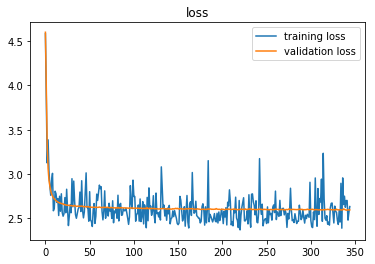

Plotting metrics...


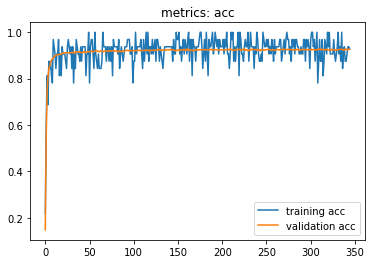

train {'acc': 0.93203634}
test {'acc': 0.9221}

Training student with temperature = 20 , coef = 400 .
Epoch 1 , step 0 , loss= 923.3061 val_loss= 923.30646 , acc = 0.03125 val acc = 0.0484 
Epoch 1 , step 100 , loss= 922.6597 val_loss= 922.613 , acc = 0.21875 val acc = 0.2632 
Epoch 1 , step 200 , loss= 922.3799 val_loss= 922.3283 , acc = 0.625 val acc = 0.5256 
Epoch 1 , step 300 , loss= 922.0834 val_loss= 922.2064 , acc = 0.6875 val acc = 0.596 
Epoch 1 , step 400 , loss= 922.0596 val_loss= 922.11975 , acc = 0.625 val acc = 0.6322 
Epoch 1 , step 500 , loss= 922.235 val_loss= 922.04486 , acc = 0.46875 val acc = 0.6714 
Epoch 1 , step 600 , loss= 922.03204 val_loss= 921.98065 , acc = 0.75 val acc = 0.7352 
Epoch 1 , step 700 , loss= 922.1241 val_loss= 921.9378 , acc = 0.59375 val acc = 0.7114 
Epoch 1 , step 800 , loss= 922.19403 val_loss= 921.9084 , acc = 0.53125 val acc = 0.763 
Epoch 1 , step 900 , loss= 921.6318 val_loss= 921.889 , acc = 0.625 val acc = 0.7546 
Epoch 1 , step 1000

Epoch 6 , step 510 , loss= 921.4637 val_loss= 921.6943 , acc = 0.84375 val acc = 0.8572 
Epoch 6 , step 610 , loss= 921.7194 val_loss= 921.6935 , acc = 0.8125 val acc = 0.8574 
Epoch 6 , step 710 , loss= 921.84186 val_loss= 921.6983 , acc = 0.9375 val acc = 0.8534 
Epoch 6 , step 810 , loss= 922.0728 val_loss= 921.69745 , acc = 0.75 val acc = 0.8602 
Epoch 6 , step 910 , loss= 921.4744 val_loss= 921.69727 , acc = 0.78125 val acc = 0.8544 
Epoch 6 , step 1010 , loss= 921.5158 val_loss= 921.6966 , acc = 0.9375 val acc = 0.8568 
Epoch 6 , step 1110 , loss= 921.7348 val_loss= 921.69507 , acc = 0.84375 val acc = 0.8484 
Epoch 6 , step 1210 , loss= 921.78955 val_loss= 921.6975 , acc = 0.875 val acc = 0.8604 
Epoch 6 , step 1310 , loss= 921.8361 val_loss= 921.69885 , acc = 0.71875 val acc = 0.8508 
Epoch 6 , step 1410 , loss= 921.8911 val_loss= 921.69196 , acc = 0.90625 val acc = 0.858 
Epoch 6 , step 1510 , loss= 921.6572 val_loss= 921.6936 , acc = 0.75 val acc = 0.8568 
Epoch 6 , step 1610 

Epoch 11 , step 1120 , loss= 921.4608 val_loss= 921.668 , acc = 0.78125 val acc = 0.8622 
Epoch 11 , step 1220 , loss= 921.61975 val_loss= 921.6705 , acc = 0.90625 val acc = 0.86 
Epoch 11 , step 1320 , loss= 921.6578 val_loss= 921.6739 , acc = 0.9375 val acc = 0.8718 
Epoch 11 , step 1420 , loss= 921.65594 val_loss= 921.6744 , acc = 0.9375 val acc = 0.8526 
Epoch 11 , step 1520 , loss= 921.6397 val_loss= 921.6653 , acc = 0.90625 val acc = 0.8668 
Epoch 11 , step 1620 , loss= 921.35803 val_loss= 921.6693 , acc = 0.9375 val acc = 0.8642 
Epoch 12 , step 2 , loss= 921.7792 val_loss= 921.6645 , acc = 0.84375 val acc = 0.8678 
Epoch 12 , step 102 , loss= 921.6204 val_loss= 921.6647 , acc = 0.78125 val acc = 0.8684 
Epoch 12 , step 202 , loss= 921.8813 val_loss= 921.6671 , acc = 0.84375 val acc = 0.8714 
Epoch 12 , step 302 , loss= 921.6478 val_loss= 921.6665 , acc = 0.84375 val acc = 0.8644 
Epoch 12 , step 402 , loss= 922.05054 val_loss= 921.6652 , acc = 0.78125 val acc = 0.8678 
Epoch 12

Epoch 16 , step 1630 , loss= 921.6939 val_loss= 921.66034 , acc = 0.8125 val acc = 0.8674 
Epoch 17 , step 12 , loss= 921.97906 val_loss= 921.65955 , acc = 0.8125 val acc = 0.8678 
Epoch 17 , step 112 , loss= 922.20734 val_loss= 921.66077 , acc = 0.71875 val acc = 0.8716 
Epoch 17 , step 212 , loss= 921.33344 val_loss= 921.6612 , acc = 0.90625 val acc = 0.8586 
Epoch 17 , step 312 , loss= 921.6491 val_loss= 921.66644 , acc = 0.8125 val acc = 0.8664 
Epoch 17 , step 412 , loss= 921.7741 val_loss= 921.6613 , acc = 0.875 val acc = 0.8622 
Epoch 17 , step 512 , loss= 921.8627 val_loss= 921.66046 , acc = 0.875 val acc = 0.8636 
Epoch 17 , step 612 , loss= 922.0368 val_loss= 921.65753 , acc = 0.875 val acc = 0.8644 
Epoch 17 , step 712 , loss= 921.6728 val_loss= 921.6621 , acc = 0.90625 val acc = 0.8694 
Epoch 17 , step 812 , loss= 921.6395 val_loss= 921.6592 , acc = 0.875 val acc = 0.8592 
Epoch 17 , step 912 , loss= 921.77765 val_loss= 921.6636 , acc = 0.90625 val acc = 0.8676 
Epoch 17 , 

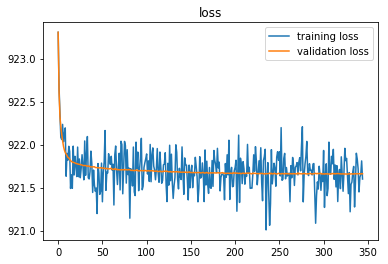

Plotting metrics...


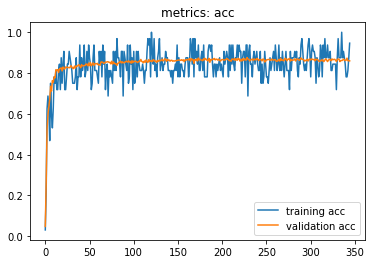

train {'acc': 0.8533818}
test {'acc': 0.8544}

Training student with temperature = 20 , coef = 0.0025 .
Epoch 1 , step 0 , loss= 2.3585403 val_loss= 2.3228235 , acc = 0.09375 val acc = 0.127 
Epoch 1 , step 100 , loss= 1.7113537 val_loss= 1.7052803 , acc = 0.59375 val acc = 0.4942 
Epoch 1 , step 200 , loss= 1.0666988 val_loss= 1.0454657 , acc = 0.84375 val acc = 0.7758 
Epoch 1 , step 300 , loss= 0.69301623 val_loss= 0.7735907 , acc = 0.78125 val acc = 0.8196 
Epoch 1 , step 400 , loss= 0.7427389 val_loss= 0.6301947 , acc = 0.8125 val acc = 0.8426 
Epoch 1 , step 500 , loss= 0.7603228 val_loss= 0.55281776 , acc = 0.75 val acc = 0.8506 
Epoch 1 , step 600 , loss= 0.893584 val_loss= 0.5014666 , acc = 0.75 val acc = 0.8668 
Epoch 1 , step 700 , loss= 0.37713578 val_loss= 0.46852654 , acc = 0.90625 val acc = 0.8712 
Epoch 1 , step 800 , loss= 0.4367137 val_loss= 0.43473774 , acc = 0.8125 val acc = 0.879 
Epoch 1 , step 900 , loss= 0.2963857 val_loss= 0.41701794 , acc = 0.84375 val acc = 0

Epoch 6 , step 210 , loss= 0.28977227 val_loss= 0.28834805 , acc = 0.875 val acc = 0.922 
Epoch 6 , step 310 , loss= 0.3514104 val_loss= 0.29304788 , acc = 0.90625 val acc = 0.9202 
Epoch 6 , step 410 , loss= 0.3838385 val_loss= 0.2876203 , acc = 0.84375 val acc = 0.922 
Epoch 6 , step 510 , loss= 0.33618927 val_loss= 0.29238066 , acc = 0.84375 val acc = 0.9226 
Epoch 6 , step 610 , loss= 0.24257609 val_loss= 0.2865073 , acc = 0.9375 val acc = 0.9266 
Epoch 6 , step 710 , loss= 0.18817921 val_loss= 0.29287946 , acc = 0.90625 val acc = 0.9212 
Epoch 6 , step 810 , loss= 0.19689097 val_loss= 0.29329687 , acc = 0.90625 val acc = 0.9226 
Epoch 6 , step 910 , loss= 0.36049676 val_loss= 0.28103226 , acc = 0.84375 val acc = 0.926 
Epoch 6 , step 1010 , loss= 0.20017941 val_loss= 0.2821029 , acc = 0.96875 val acc = 0.9262 
Epoch 6 , step 1110 , loss= 0.17816433 val_loss= 0.28522906 , acc = 0.9375 val acc = 0.925 
Epoch 6 , step 1210 , loss= 0.4171455 val_loss= 0.2880271 , acc = 0.9375 val acc 

Epoch 11 , step 520 , loss= 0.5407209 val_loss= 0.27434093 , acc = 0.875 val acc = 0.927 
Epoch 11 , step 620 , loss= 0.19379604 val_loss= 0.2825828 , acc = 0.9375 val acc = 0.9252 
Epoch 11 , step 720 , loss= 0.08367468 val_loss= 0.27899083 , acc = 1.0 val acc = 0.9288 
Epoch 11 , step 820 , loss= 0.14604102 val_loss= 0.2727587 , acc = 0.96875 val acc = 0.9308 
Epoch 11 , step 920 , loss= 0.2531738 val_loss= 0.27300456 , acc = 0.875 val acc = 0.9302 
Epoch 11 , step 1020 , loss= 0.1855727 val_loss= 0.27643135 , acc = 0.9375 val acc = 0.9296 
Epoch 11 , step 1120 , loss= 0.3335438 val_loss= 0.27223986 , acc = 0.9375 val acc = 0.9312 
Epoch 11 , step 1220 , loss= 0.1993687 val_loss= 0.27274075 , acc = 0.9375 val acc = 0.9268 
Epoch 11 , step 1320 , loss= 0.19042781 val_loss= 0.2741387 , acc = 0.9375 val acc = 0.9298 
Epoch 11 , step 1420 , loss= 1.0158303 val_loss= 0.27435693 , acc = 0.90625 val acc = 0.929 
Epoch 11 , step 1520 , loss= 0.13640115 val_loss= 0.27593318 , acc = 0.9375 val

Epoch 16 , step 730 , loss= 0.59722775 val_loss= 0.2667979 , acc = 0.9375 val acc = 0.9322 
Epoch 16 , step 830 , loss= 0.16011272 val_loss= 0.26680723 , acc = 0.96875 val acc = 0.9314 
Epoch 16 , step 930 , loss= 0.2375809 val_loss= 0.2670386 , acc = 0.875 val acc = 0.9298 
Epoch 16 , step 1030 , loss= 0.67554575 val_loss= 0.26730222 , acc = 0.84375 val acc = 0.9322 
Epoch 16 , step 1130 , loss= 0.4260716 val_loss= 0.27050343 , acc = 0.90625 val acc = 0.9314 
Epoch 16 , step 1230 , loss= 0.10165865 val_loss= 0.26698098 , acc = 0.96875 val acc = 0.9326 
Epoch 16 , step 1330 , loss= 0.13497667 val_loss= 0.26507494 , acc = 0.9375 val acc = 0.9314 
Epoch 16 , step 1430 , loss= 0.43021092 val_loss= 0.2636454 , acc = 0.90625 val acc = 0.9326 
Epoch 16 , step 1530 , loss= 0.1472094 val_loss= 0.26550278 , acc = 0.9375 val acc = 0.9326 
Epoch 16 , step 1630 , loss= 0.3810558 val_loss= 0.26398534 , acc = 0.9375 val acc = 0.9316 
Epoch 17 , step 12 , loss= 0.14387932 val_loss= 0.26324555 , acc =

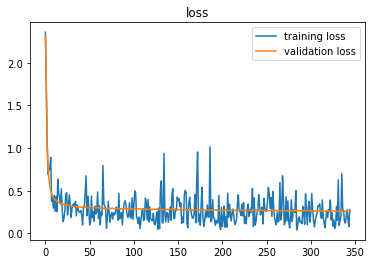

Plotting metrics...


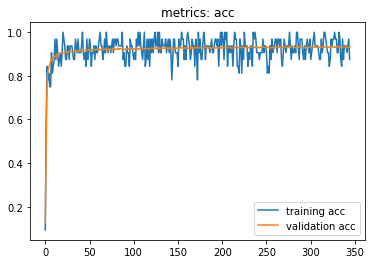

train {'acc': 0.93474543}
test {'acc': 0.9283}

Training student with temperature = 30 , coef = 1 .
Epoch 1 , step 0 , loss= 4.587787 val_loss= 4.6166573 , acc = 0.1875 val acc = 0.1206 
Epoch 1 , step 100 , loss= 3.9823987 val_loss= 3.948611 , acc = 0.5625 val acc = 0.5668 
Epoch 1 , step 200 , loss= 3.2735531 val_loss= 3.2849002 , acc = 0.65625 val acc = 0.7556 
Epoch 1 , step 300 , loss= 3.1295857 val_loss= 3.0288627 , acc = 0.78125 val acc = 0.8068 
Epoch 1 , step 400 , loss= 2.7770534 val_loss= 2.917644 , acc = 0.875 val acc = 0.8366 
Epoch 1 , step 500 , loss= 2.6673582 val_loss= 2.8416579 , acc = 0.9375 val acc = 0.8586 
Epoch 1 , step 600 , loss= 2.745331 val_loss= 2.7940085 , acc = 0.84375 val acc = 0.8746 
Epoch 1 , step 700 , loss= 2.8569915 val_loss= 2.763929 , acc = 0.875 val acc = 0.8836 
Epoch 1 , step 800 , loss= 2.8230395 val_loss= 2.7392495 , acc = 0.84375 val acc = 0.8844 
Epoch 1 , step 900 , loss= 2.7123456 val_loss= 2.7198412 , acc = 0.875 val acc = 0.8848 
Epoch 

Epoch 6 , step 410 , loss= 2.6301463 val_loss= 2.5937169 , acc = 0.90625 val acc = 0.9226 
Epoch 6 , step 510 , loss= 2.420527 val_loss= 2.5970085 , acc = 1.0 val acc = 0.921 
Epoch 6 , step 610 , loss= 2.6781766 val_loss= 2.5912356 , acc = 0.90625 val acc = 0.9208 
Epoch 6 , step 710 , loss= 2.5358763 val_loss= 2.5946534 , acc = 0.9375 val acc = 0.921 
Epoch 6 , step 810 , loss= 2.5864248 val_loss= 2.5922716 , acc = 0.90625 val acc = 0.9224 
Epoch 6 , step 910 , loss= 2.522907 val_loss= 2.5919302 , acc = 0.96875 val acc = 0.9222 
Epoch 6 , step 1010 , loss= 2.5370734 val_loss= 2.5922403 , acc = 0.9375 val acc = 0.924 
Epoch 6 , step 1110 , loss= 2.6156096 val_loss= 2.5907474 , acc = 0.90625 val acc = 0.9248 
Epoch 6 , step 1210 , loss= 2.9061615 val_loss= 2.5904417 , acc = 0.78125 val acc = 0.9234 
Epoch 6 , step 1310 , loss= 2.437973 val_loss= 2.5923204 , acc = 0.96875 val acc = 0.9232 
Epoch 6 , step 1410 , loss= 2.4987733 val_loss= 2.5967386 , acc = 0.96875 val acc = 0.9184 
Epoch 

Epoch 11 , step 920 , loss= 2.5404272 val_loss= 2.5873756 , acc = 0.9375 val acc = 0.9248 
Epoch 11 , step 1020 , loss= 2.5437667 val_loss= 2.5839574 , acc = 0.90625 val acc = 0.9258 
Epoch 11 , step 1120 , loss= 2.5328429 val_loss= 2.5846152 , acc = 0.9375 val acc = 0.9284 
Epoch 11 , step 1220 , loss= 2.4540963 val_loss= 2.5839925 , acc = 1.0 val acc = 0.9266 
Epoch 11 , step 1320 , loss= 2.4684188 val_loss= 2.5820162 , acc = 0.96875 val acc = 0.9272 
Epoch 11 , step 1420 , loss= 2.558902 val_loss= 2.5857894 , acc = 0.90625 val acc = 0.9248 
Epoch 11 , step 1520 , loss= 2.5579607 val_loss= 2.5827184 , acc = 0.90625 val acc = 0.925 
Epoch 11 , step 1620 , loss= 2.5131574 val_loss= 2.5874305 , acc = 0.875 val acc = 0.9258 
Epoch 12 , step 2 , loss= 2.6869674 val_loss= 2.5818172 , acc = 0.9375 val acc = 0.9288 
Epoch 12 , step 102 , loss= 2.7947314 val_loss= 2.5806766 , acc = 0.90625 val acc = 0.9264 
Epoch 12 , step 202 , loss= 2.7952383 val_loss= 2.5881736 , acc = 0.875 val acc = 0.92

Epoch 16 , step 1330 , loss= 2.4089255 val_loss= 2.5804145 , acc = 0.96875 val acc = 0.926 
Epoch 16 , step 1430 , loss= 2.464895 val_loss= 2.5786376 , acc = 0.96875 val acc = 0.9288 
Epoch 16 , step 1530 , loss= 2.700933 val_loss= 2.5826128 , acc = 0.90625 val acc = 0.9298 
Epoch 16 , step 1630 , loss= 2.7188518 val_loss= 2.5809202 , acc = 0.90625 val acc = 0.9272 
Epoch 17 , step 12 , loss= 2.5640082 val_loss= 2.5811102 , acc = 0.90625 val acc = 0.928 
Epoch 17 , step 112 , loss= 2.3868074 val_loss= 2.5799513 , acc = 1.0 val acc = 0.9306 
Epoch 17 , step 212 , loss= 2.6182437 val_loss= 2.5866008 , acc = 0.90625 val acc = 0.9282 
Epoch 17 , step 312 , loss= 2.4027781 val_loss= 2.5860634 , acc = 1.0 val acc = 0.929 
Epoch 17 , step 412 , loss= 2.7728515 val_loss= 2.5844 , acc = 0.90625 val acc = 0.9282 
Epoch 17 , step 512 , loss= 2.4718032 val_loss= 2.5923414 , acc = 0.96875 val acc = 0.9264 
Epoch 17 , step 612 , loss= 2.6157963 val_loss= 2.5870924 , acc = 0.9375 val acc = 0.9266 
Ep

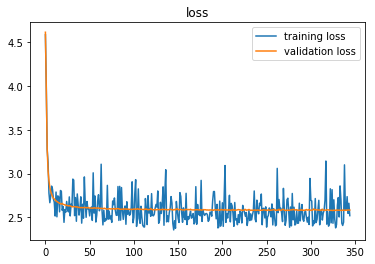

Plotting metrics...


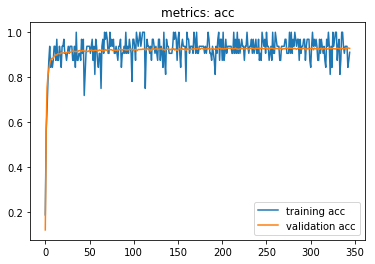

train {'acc': 0.93250906}
test {'acc': 0.9255}

Training student with temperature = 30 , coef = 900 .
Epoch 1 , step 0 , loss= 2074.6746 val_loss= 2074.708 , acc = 0.0625 val acc = 0.0748 
Epoch 1 , step 100 , loss= 2073.6052 val_loss= 2073.6638 , acc = 0.03125 val acc = 0.1408 
Epoch 1 , step 200 , loss= 2072.994 val_loss= 2073.3015 , acc = 0.40625 val acc = 0.3684 
Epoch 1 , step 300 , loss= 2073.1328 val_loss= 2073.051 , acc = 0.40625 val acc = 0.4342 
Epoch 1 , step 400 , loss= 2072.6018 val_loss= 2072.901 , acc = 0.46875 val acc = 0.548 
Epoch 1 , step 500 , loss= 2072.2402 val_loss= 2072.8235 , acc = 0.59375 val acc = 0.5684 
Epoch 1 , step 600 , loss= 2072.9531 val_loss= 2072.7686 , acc = 0.5 val acc = 0.5862 
Epoch 1 , step 700 , loss= 2073.3108 val_loss= 2072.7246 , acc = 0.40625 val acc = 0.6112 
Epoch 1 , step 800 , loss= 2072.617 val_loss= 2072.6863 , acc = 0.59375 val acc = 0.6228 
Epoch 1 , step 900 , loss= 2073.0093 val_loss= 2072.65 , acc = 0.5 val acc = 0.6138 
Epoch 1

Epoch 6 , step 410 , loss= 2072.2244 val_loss= 2072.397 , acc = 0.75 val acc = 0.7624 
Epoch 6 , step 510 , loss= 2072.5076 val_loss= 2072.391 , acc = 0.78125 val acc = 0.7498 
Epoch 6 , step 610 , loss= 2072.0398 val_loss= 2072.3928 , acc = 0.78125 val acc = 0.7558 
Epoch 6 , step 710 , loss= 2072.352 val_loss= 2072.3923 , acc = 0.65625 val acc = 0.752 
Epoch 6 , step 810 , loss= 2072.8613 val_loss= 2072.3936 , acc = 0.78125 val acc = 0.7618 
Epoch 6 , step 910 , loss= 2072.4788 val_loss= 2072.3901 , acc = 0.6875 val acc = 0.7636 
Epoch 6 , step 1010 , loss= 2072.9185 val_loss= 2072.3914 , acc = 0.625 val acc = 0.7704 
Epoch 6 , step 1110 , loss= 2072.1208 val_loss= 2072.3916 , acc = 0.90625 val acc = 0.7498 
Epoch 6 , step 1210 , loss= 2072.4458 val_loss= 2072.3909 , acc = 0.75 val acc = 0.7658 
Epoch 6 , step 1310 , loss= 2071.996 val_loss= 2072.3901 , acc = 0.71875 val acc = 0.7734 
Epoch 6 , step 1410 , loss= 2072.5723 val_loss= 2072.3904 , acc = 0.75 val acc = 0.7574 
Epoch 6 , s

Epoch 11 , step 920 , loss= 2072.5703 val_loss= 2072.3843 , acc = 0.8125 val acc = 0.7606 
Epoch 11 , step 1020 , loss= 2072.2126 val_loss= 2072.3962 , acc = 0.875 val acc = 0.7896 
Epoch 11 , step 1120 , loss= 2072.365 val_loss= 2072.3845 , acc = 0.6875 val acc = 0.7694 
Epoch 11 , step 1220 , loss= 2072.6716 val_loss= 2072.386 , acc = 0.6875 val acc = 0.7746 
Epoch 11 , step 1320 , loss= 2072.8164 val_loss= 2072.3838 , acc = 0.71875 val acc = 0.7628 
Epoch 11 , step 1420 , loss= 2072.563 val_loss= 2072.386 , acc = 0.875 val acc = 0.7606 
Epoch 11 , step 1520 , loss= 2072.3787 val_loss= 2072.3838 , acc = 0.71875 val acc = 0.7652 
Epoch 11 , step 1620 , loss= 2071.9707 val_loss= 2072.3835 , acc = 0.75 val acc = 0.7524 
Epoch 12 , step 2 , loss= 2072.9775 val_loss= 2072.3887 , acc = 0.78125 val acc = 0.7474 
Epoch 12 , step 102 , loss= 2072.4197 val_loss= 2072.3826 , acc = 0.75 val acc = 0.7596 
Epoch 12 , step 202 , loss= 2072.5867 val_loss= 2072.3882 , acc = 0.71875 val acc = 0.764 
E

Epoch 16 , step 1330 , loss= 2072.4746 val_loss= 2072.383 , acc = 0.6875 val acc = 0.7564 
Epoch 16 , step 1430 , loss= 2071.93 val_loss= 2072.38 , acc = 0.875 val acc = 0.7726 
Epoch 16 , step 1530 , loss= 2072.4048 val_loss= 2072.386 , acc = 0.8125 val acc = 0.764 
Epoch 16 , step 1630 , loss= 2072.7732 val_loss= 2072.384 , acc = 0.65625 val acc = 0.7652 
Epoch 17 , step 12 , loss= 2072.249 val_loss= 2072.3806 , acc = 0.75 val acc = 0.7698 
Epoch 17 , step 112 , loss= 2072.6418 val_loss= 2072.385 , acc = 0.78125 val acc = 0.7698 
Epoch 17 , step 212 , loss= 2072.3953 val_loss= 2072.3862 , acc = 0.78125 val acc = 0.7744 
Epoch 17 , step 312 , loss= 2072.6855 val_loss= 2072.3872 , acc = 0.71875 val acc = 0.76 
Epoch 17 , step 412 , loss= 2072.5378 val_loss= 2072.3877 , acc = 0.78125 val acc = 0.7624 
Epoch 17 , step 512 , loss= 2072.3025 val_loss= 2072.387 , acc = 0.84375 val acc = 0.7716 
Epoch 17 , step 612 , loss= 2072.0015 val_loss= 2072.3838 , acc = 0.78125 val acc = 0.781 
Epoch 

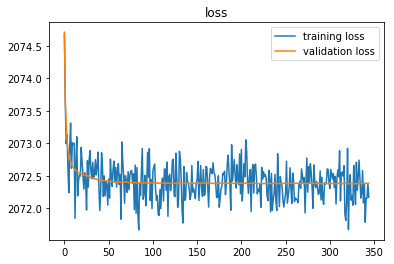

Plotting metrics...


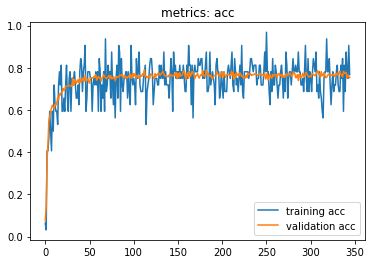

train {'acc': 0.7546909}
test {'acc': 0.7541}

Training student with temperature = 30 , coef = 0.0011111111111111111 .
Epoch 1 , step 0 , loss= 2.256099 val_loss= 2.2755642 , acc = 0.09375 val acc = 0.1188 
Epoch 1 , step 100 , loss= 1.5489864 val_loss= 1.6324003 , acc = 0.59375 val acc = 0.489 
Epoch 1 , step 200 , loss= 1.1445485 val_loss= 1.0634829 , acc = 0.78125 val acc = 0.7152 
Epoch 1 , step 300 , loss= 0.77656263 val_loss= 0.74802387 , acc = 0.75 val acc = 0.804 
Epoch 1 , step 400 , loss= 0.52151054 val_loss= 0.61249757 , acc = 0.875 val acc = 0.8308 
Epoch 1 , step 500 , loss= 0.68927985 val_loss= 0.5330696 , acc = 0.875 val acc = 0.857 
Epoch 1 , step 600 , loss= 0.5871078 val_loss= 0.48642525 , acc = 0.78125 val acc = 0.8694 
Epoch 1 , step 700 , loss= 0.29284623 val_loss= 0.45219058 , acc = 0.9375 val acc = 0.8746 
Epoch 1 , step 800 , loss= 0.22284539 val_loss= 0.4252976 , acc = 0.96875 val acc = 0.8856 
Epoch 1 , step 900 , loss= 0.20541677 val_loss= 0.40714714 , acc = 

Epoch 6 , step 210 , loss= 0.1453499 val_loss= 0.26013845 , acc = 1.0 val acc = 0.926 
Epoch 6 , step 310 , loss= 0.22690493 val_loss= 0.25918627 , acc = 0.9375 val acc = 0.9268 
Epoch 6 , step 410 , loss= 0.21047288 val_loss= 0.2659948 , acc = 0.96875 val acc = 0.9244 
Epoch 6 , step 510 , loss= 0.440084 val_loss= 0.26171386 , acc = 0.96875 val acc = 0.9264 
Epoch 6 , step 610 , loss= 0.74500597 val_loss= 0.26068658 , acc = 0.8125 val acc = 0.931 
Epoch 6 , step 710 , loss= 0.11531268 val_loss= 0.26440072 , acc = 0.96875 val acc = 0.9256 
Epoch 6 , step 810 , loss= 0.43052945 val_loss= 0.26618886 , acc = 0.90625 val acc = 0.9272 
Epoch 6 , step 910 , loss= 0.058546174 val_loss= 0.2605559 , acc = 1.0 val acc = 0.9246 
Epoch 6 , step 1010 , loss= 0.23289739 val_loss= 0.2614893 , acc = 0.90625 val acc = 0.9252 
Epoch 6 , step 1110 , loss= 0.21230951 val_loss= 0.262444 , acc = 0.96875 val acc = 0.924 
Epoch 6 , step 1210 , loss= 0.24402797 val_loss= 0.25568047 , acc = 0.90625 val acc = 0.

Epoch 11 , step 520 , loss= 0.1526951 val_loss= 0.24887834 , acc = 0.96875 val acc = 0.9296 
Epoch 11 , step 620 , loss= 0.22686322 val_loss= 0.25878468 , acc = 0.9375 val acc = 0.9274 
Epoch 11 , step 720 , loss= 0.10662728 val_loss= 0.24671695 , acc = 0.96875 val acc = 0.9302 
Epoch 11 , step 820 , loss= 0.24889657 val_loss= 0.24577954 , acc = 0.9375 val acc = 0.9288 
Epoch 11 , step 920 , loss= 0.22158211 val_loss= 0.25393426 , acc = 0.96875 val acc = 0.9294 
Epoch 11 , step 1020 , loss= 0.14854042 val_loss= 0.24564196 , acc = 0.9375 val acc = 0.927 
Epoch 11 , step 1120 , loss= 0.24576966 val_loss= 0.25206298 , acc = 0.9375 val acc = 0.9272 
Epoch 11 , step 1220 , loss= 0.2998477 val_loss= 0.25181088 , acc = 0.9375 val acc = 0.9296 
Epoch 11 , step 1320 , loss= 0.1991161 val_loss= 0.24756806 , acc = 0.90625 val acc = 0.9278 
Epoch 11 , step 1420 , loss= 0.11112684 val_loss= 0.25503978 , acc = 0.96875 val acc = 0.9262 
Epoch 11 , step 1520 , loss= 0.1899809 val_loss= 0.24698064 , ac

Epoch 16 , step 730 , loss= 0.064297624 val_loss= 0.24737625 , acc = 0.96875 val acc = 0.9274 
Epoch 16 , step 830 , loss= 0.19791748 val_loss= 0.2486233 , acc = 0.90625 val acc = 0.9286 
Epoch 16 , step 930 , loss= 0.049253263 val_loss= 0.2475799 , acc = 1.0 val acc = 0.928 
Epoch 16 , step 1030 , loss= 0.20197019 val_loss= 0.2477661 , acc = 0.9375 val acc = 0.9296 
Epoch 16 , step 1130 , loss= 0.14753376 val_loss= 0.24916846 , acc = 0.96875 val acc = 0.9298 
Epoch 16 , step 1230 , loss= 0.60139185 val_loss= 0.24851535 , acc = 0.8125 val acc = 0.931 
Epoch 16 , step 1330 , loss= 0.32705194 val_loss= 0.24992222 , acc = 0.875 val acc = 0.9302 
Epoch 16 , step 1430 , loss= 0.13118903 val_loss= 0.24789232 , acc = 0.96875 val acc = 0.9318 
Epoch 16 , step 1530 , loss= 0.13561137 val_loss= 0.24883741 , acc = 0.9375 val acc = 0.9294 
Epoch 16 , step 1630 , loss= 0.12946373 val_loss= 0.25359493 , acc = 0.96875 val acc = 0.931 
Epoch 17 , step 12 , loss= 0.34104168 val_loss= 0.24940825 , acc =

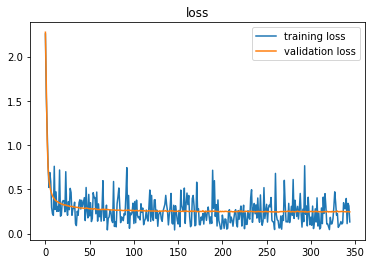

Plotting metrics...


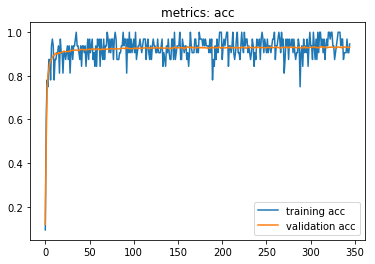

train {'acc': 0.9381818}
test {'acc': 0.9291}

Training student with temperature = 40 , coef = 1 .
Epoch 1 , step 0 , loss= 4.516021 val_loss= 4.5888896 , acc = 0.375 val acc = 0.1252 
Epoch 1 , step 100 , loss= 3.834906 val_loss= 3.8744526 , acc = 0.65625 val acc = 0.6132 
Epoch 1 , step 200 , loss= 3.4781961 val_loss= 3.2884438 , acc = 0.71875 val acc = 0.7508 
Epoch 1 , step 300 , loss= 2.9617732 val_loss= 3.0329146 , acc = 0.8125 val acc = 0.8038 
Epoch 1 , step 400 , loss= 3.23832 val_loss= 2.913985 , acc = 0.6875 val acc = 0.8192 
Epoch 1 , step 500 , loss= 2.9752073 val_loss= 2.8392274 , acc = 0.78125 val acc = 0.8444 
Epoch 1 , step 600 , loss= 2.6557157 val_loss= 2.7888553 , acc = 0.90625 val acc = 0.8654 
Epoch 1 , step 700 , loss= 2.6470187 val_loss= 2.7560458 , acc = 0.90625 val acc = 0.8712 
Epoch 1 , step 800 , loss= 2.650275 val_loss= 2.7353282 , acc = 0.875 val acc = 0.8772 
Epoch 1 , step 900 , loss= 2.734997 val_loss= 2.7135596 , acc = 0.90625 val acc = 0.8826 
Epoch 

Epoch 6 , step 410 , loss= 2.4557455 val_loss= 2.6050887 , acc = 0.96875 val acc = 0.9178 
Epoch 6 , step 510 , loss= 2.7108269 val_loss= 2.5983274 , acc = 0.84375 val acc = 0.9208 
Epoch 6 , step 610 , loss= 2.618044 val_loss= 2.6081169 , acc = 0.875 val acc = 0.9164 
Epoch 6 , step 710 , loss= 2.4406698 val_loss= 2.6083171 , acc = 0.96875 val acc = 0.9166 
Epoch 6 , step 810 , loss= 2.4700994 val_loss= 2.5973244 , acc = 0.96875 val acc = 0.9218 
Epoch 6 , step 910 , loss= 2.8071935 val_loss= 2.5981455 , acc = 0.875 val acc = 0.918 
Epoch 6 , step 1010 , loss= 2.7146318 val_loss= 2.5963223 , acc = 0.84375 val acc = 0.9212 
Epoch 6 , step 1110 , loss= 2.5737448 val_loss= 2.600759 , acc = 0.875 val acc = 0.9194 
Epoch 6 , step 1210 , loss= 2.5910594 val_loss= 2.6027894 , acc = 0.90625 val acc = 0.9198 
Epoch 6 , step 1310 , loss= 2.6600575 val_loss= 2.597931 , acc = 0.90625 val acc = 0.9188 
Epoch 6 , step 1410 , loss= 2.5180836 val_loss= 2.5954561 , acc = 0.9375 val acc = 0.9212 
Epoch

Epoch 11 , step 920 , loss= 2.402721 val_loss= 2.5851367 , acc = 1.0 val acc = 0.9234 
Epoch 11 , step 1020 , loss= 2.5789769 val_loss= 2.5910609 , acc = 0.96875 val acc = 0.922 
Epoch 11 , step 1120 , loss= 2.6227496 val_loss= 2.588879 , acc = 0.90625 val acc = 0.924 
Epoch 11 , step 1220 , loss= 2.4228547 val_loss= 2.5852191 , acc = 0.96875 val acc = 0.9248 
Epoch 11 , step 1320 , loss= 2.5232143 val_loss= 2.5856857 , acc = 0.90625 val acc = 0.9242 
Epoch 11 , step 1420 , loss= 2.7598596 val_loss= 2.5852423 , acc = 0.84375 val acc = 0.9256 
Epoch 11 , step 1520 , loss= 2.614332 val_loss= 2.5853355 , acc = 0.90625 val acc = 0.9222 
Epoch 11 , step 1620 , loss= 2.5110714 val_loss= 2.5868816 , acc = 0.96875 val acc = 0.926 
Epoch 12 , step 2 , loss= 2.5792797 val_loss= 2.5843787 , acc = 0.90625 val acc = 0.9258 
Epoch 12 , step 102 , loss= 2.4027326 val_loss= 2.588643 , acc = 0.96875 val acc = 0.923 
Epoch 12 , step 202 , loss= 2.4600825 val_loss= 2.5857418 , acc = 0.90625 val acc = 0.9

Epoch 16 , step 1330 , loss= 2.7895553 val_loss= 2.5819159 , acc = 0.84375 val acc = 0.9248 
Epoch 16 , step 1430 , loss= 2.6084223 val_loss= 2.5776646 , acc = 0.875 val acc = 0.9272 
Epoch 16 , step 1530 , loss= 2.5627332 val_loss= 2.5761442 , acc = 0.90625 val acc = 0.925 
Epoch 16 , step 1630 , loss= 2.444581 val_loss= 2.588717 , acc = 0.9375 val acc = 0.9222 
Epoch 17 , step 12 , loss= 2.3873725 val_loss= 2.57975 , acc = 1.0 val acc = 0.924 
Epoch 17 , step 112 , loss= 2.5555544 val_loss= 2.5837202 , acc = 0.90625 val acc = 0.923 
Epoch 17 , step 212 , loss= 2.5730317 val_loss= 2.580737 , acc = 0.90625 val acc = 0.9256 
Epoch 17 , step 312 , loss= 2.5867057 val_loss= 2.5832791 , acc = 0.90625 val acc = 0.9254 
Epoch 17 , step 412 , loss= 2.3757455 val_loss= 2.5818362 , acc = 1.0 val acc = 0.923 
Epoch 17 , step 512 , loss= 3.075524 val_loss= 2.5810506 , acc = 0.875 val acc = 0.9242 
Epoch 17 , step 612 , loss= 2.565176 val_loss= 2.5832007 , acc = 0.96875 val acc = 0.9224 
Epoch 17 

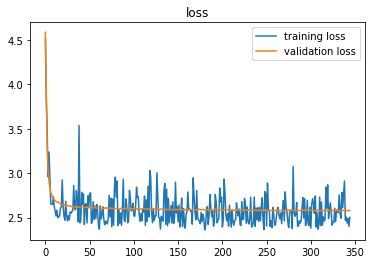

Plotting metrics...


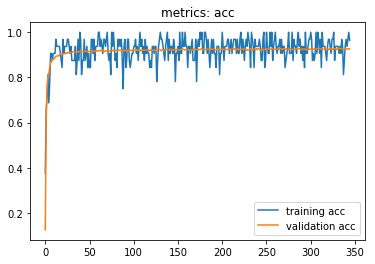

train {'acc': 0.92938185}
test {'acc': 0.9221}

Training student with temperature = 40 , coef = 1600 .
Epoch 1 , step 0 , loss= 3686.5361 val_loss= 3686.494 , acc = 0.15625 val acc = 0.1856 
Epoch 1 , step 100 , loss= 3685.1882 val_loss= 3685.4817 , acc = 0.28125 val acc = 0.259 
Epoch 1 , step 200 , loss= 3684.7673 val_loss= 3685.033 , acc = 0.5625 val acc = 0.5104 
Epoch 1 , step 300 , loss= 3684.7368 val_loss= 3684.7776 , acc = 0.6875 val acc = 0.5972 
Epoch 1 , step 400 , loss= 3684.62 val_loss= 3684.637 , acc = 0.6875 val acc = 0.6228 
Epoch 1 , step 500 , loss= 3684.6948 val_loss= 3684.5625 , acc = 0.5 val acc = 0.6852 
Epoch 1 , step 600 , loss= 3684.6748 val_loss= 3684.5308 , acc = 0.65625 val acc = 0.6994 
Epoch 1 , step 700 , loss= 3684.1096 val_loss= 3684.4958 , acc = 0.84375 val acc = 0.7182 
Epoch 1 , step 800 , loss= 3684.7158 val_loss= 3684.4758 , acc = 0.8125 val acc = 0.7218 
Epoch 1 , step 900 , loss= 3684.3408 val_loss= 3684.4668 , acc = 0.71875 val acc = 0.7338 
Epo

Epoch 6 , step 410 , loss= 3684.2607 val_loss= 3684.3164 , acc = 0.84375 val acc = 0.7978 
Epoch 6 , step 510 , loss= 3684.1733 val_loss= 3684.3223 , acc = 0.9375 val acc = 0.7926 
Epoch 6 , step 610 , loss= 3684.6343 val_loss= 3684.3188 , acc = 0.71875 val acc = 0.7876 
Epoch 6 , step 710 , loss= 3684.3423 val_loss= 3684.32 , acc = 0.8125 val acc = 0.79 
Epoch 6 , step 810 , loss= 3684.646 val_loss= 3684.3184 , acc = 0.71875 val acc = 0.7874 
Epoch 6 , step 910 , loss= 3684.0576 val_loss= 3684.3325 , acc = 0.8125 val acc = 0.784 
Epoch 6 , step 1010 , loss= 3683.9866 val_loss= 3684.3171 , acc = 0.84375 val acc = 0.794 
Epoch 6 , step 1110 , loss= 3684.4648 val_loss= 3684.3135 , acc = 0.75 val acc = 0.8042 
Epoch 6 , step 1210 , loss= 3684.732 val_loss= 3684.3176 , acc = 0.65625 val acc = 0.7898 
Epoch 6 , step 1310 , loss= 3684.1582 val_loss= 3684.3162 , acc = 0.78125 val acc = 0.798 
Epoch 6 , step 1410 , loss= 3684.1575 val_loss= 3684.315 , acc = 0.75 val acc = 0.803 
Epoch 6 , step

Epoch 11 , step 920 , loss= 3683.8918 val_loss= 3684.292 , acc = 0.84375 val acc = 0.798 
Epoch 11 , step 1020 , loss= 3684.2065 val_loss= 3684.2988 , acc = 0.875 val acc = 0.8038 
Epoch 11 , step 1120 , loss= 3683.8838 val_loss= 3684.2957 , acc = 0.75 val acc = 0.7918 
Epoch 11 , step 1220 , loss= 3684.3508 val_loss= 3684.2952 , acc = 0.90625 val acc = 0.7784 
Epoch 11 , step 1320 , loss= 3684.4553 val_loss= 3684.2961 , acc = 0.75 val acc = 0.7962 
Epoch 11 , step 1420 , loss= 3684.348 val_loss= 3684.2893 , acc = 0.84375 val acc = 0.7926 
Epoch 11 , step 1520 , loss= 3684.2 val_loss= 3684.2927 , acc = 0.71875 val acc = 0.7932 
Epoch 11 , step 1620 , loss= 3684.253 val_loss= 3684.2925 , acc = 0.8125 val acc = 0.7852 
Epoch 12 , step 2 , loss= 3684.5046 val_loss= 3684.2944 , acc = 0.71875 val acc = 0.7972 
Epoch 12 , step 102 , loss= 3684.0493 val_loss= 3684.2903 , acc = 0.78125 val acc = 0.8108 
Epoch 12 , step 202 , loss= 3683.9988 val_loss= 3684.292 , acc = 0.6875 val acc = 0.7826 
E

Epoch 16 , step 1330 , loss= 3684.0967 val_loss= 3684.2935 , acc = 0.8125 val acc = 0.7778 
Epoch 16 , step 1430 , loss= 3684.3538 val_loss= 3684.2888 , acc = 0.75 val acc = 0.8052 
Epoch 16 , step 1530 , loss= 3684.0146 val_loss= 3684.2776 , acc = 0.84375 val acc = 0.796 
Epoch 16 , step 1630 , loss= 3684.3525 val_loss= 3684.2905 , acc = 0.84375 val acc = 0.797 
Epoch 17 , step 12 , loss= 3684.6028 val_loss= 3684.28 , acc = 0.6875 val acc = 0.7752 
Epoch 17 , step 112 , loss= 3684.1262 val_loss= 3684.2861 , acc = 0.8125 val acc = 0.789 
Epoch 17 , step 212 , loss= 3684.0952 val_loss= 3684.2834 , acc = 0.875 val acc = 0.7928 
Epoch 17 , step 312 , loss= 3684.3872 val_loss= 3684.2852 , acc = 0.75 val acc = 0.79 
Epoch 17 , step 412 , loss= 3684.7117 val_loss= 3684.2847 , acc = 0.8125 val acc = 0.79 
Epoch 17 , step 512 , loss= 3684.7856 val_loss= 3684.286 , acc = 0.65625 val acc = 0.8106 
Epoch 17 , step 612 , loss= 3684.4827 val_loss= 3684.2834 , acc = 0.65625 val acc = 0.7812 
Epoch 1

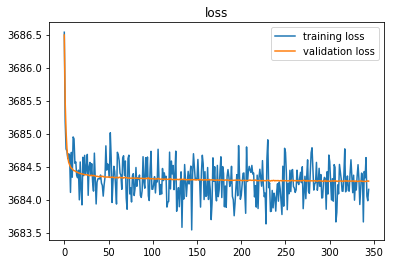

Plotting metrics...


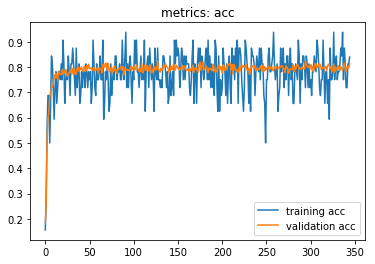

train {'acc': 0.80805457}
test {'acc': 0.8073}

Training student with temperature = 40 , coef = 0.000625 .
Epoch 1 , step 0 , loss= 2.350514 val_loss= 2.3389933 , acc = 0.125 val acc = 0.0694 
Epoch 1 , step 100 , loss= 1.9277918 val_loss= 1.8548725 , acc = 0.53125 val acc = 0.476 
Epoch 1 , step 200 , loss= 1.0443318 val_loss= 1.0910604 , acc = 0.6875 val acc = 0.7134 
Epoch 1 , step 300 , loss= 0.7938701 val_loss= 0.7378144 , acc = 0.84375 val acc = 0.801 
Epoch 1 , step 400 , loss= 0.5269316 val_loss= 0.59827626 , acc = 0.84375 val acc = 0.8306 
Epoch 1 , step 500 , loss= 0.49577513 val_loss= 0.5174351 , acc = 0.84375 val acc = 0.8586 
Epoch 1 , step 600 , loss= 0.6496785 val_loss= 0.47405282 , acc = 0.78125 val acc = 0.8686 
Epoch 1 , step 700 , loss= 0.3932073 val_loss= 0.45009175 , acc = 0.9375 val acc = 0.8786 
Epoch 1 , step 800 , loss= 0.38304392 val_loss= 0.4241668 , acc = 0.875 val acc = 0.8792 
Epoch 1 , step 900 , loss= 0.3848188 val_loss= 0.4074386 , acc = 0.90625 val acc

Epoch 6 , step 210 , loss= 0.13424753 val_loss= 0.26649833 , acc = 0.90625 val acc = 0.9236 
Epoch 6 , step 310 , loss= 0.080902785 val_loss= 0.26895723 , acc = 0.96875 val acc = 0.9218 
Epoch 6 , step 410 , loss= 0.09031152 val_loss= 0.26990458 , acc = 0.96875 val acc = 0.9224 
Epoch 6 , step 510 , loss= 0.09514326 val_loss= 0.26562285 , acc = 1.0 val acc = 0.926 
Epoch 6 , step 610 , loss= 0.4228032 val_loss= 0.2683865 , acc = 0.90625 val acc = 0.923 
Epoch 6 , step 710 , loss= 0.22061415 val_loss= 0.26320603 , acc = 0.96875 val acc = 0.9248 
Epoch 6 , step 810 , loss= 0.2189776 val_loss= 0.26951838 , acc = 0.9375 val acc = 0.9234 
Epoch 6 , step 910 , loss= 0.17479472 val_loss= 0.26916578 , acc = 0.9375 val acc = 0.9238 
Epoch 6 , step 1010 , loss= 0.47933665 val_loss= 0.2675661 , acc = 0.875 val acc = 0.9226 
Epoch 6 , step 1110 , loss= 0.15374787 val_loss= 0.26708955 , acc = 0.9375 val acc = 0.925 
Epoch 6 , step 1210 , loss= 0.29132143 val_loss= 0.26735643 , acc = 0.84375 val acc

Epoch 11 , step 520 , loss= 0.50509113 val_loss= 0.2569754 , acc = 0.90625 val acc = 0.9244 
Epoch 11 , step 620 , loss= 0.20683852 val_loss= 0.25158414 , acc = 0.90625 val acc = 0.9258 
Epoch 11 , step 720 , loss= 0.42835578 val_loss= 0.25456607 , acc = 0.84375 val acc = 0.9246 
Epoch 11 , step 820 , loss= 0.26201504 val_loss= 0.25736108 , acc = 0.84375 val acc = 0.9224 
Epoch 11 , step 920 , loss= 0.30511582 val_loss= 0.2580704 , acc = 0.9375 val acc = 0.9244 
Epoch 11 , step 1020 , loss= 0.17898557 val_loss= 0.2560555 , acc = 0.9375 val acc = 0.9274 
Epoch 11 , step 1120 , loss= 0.18954457 val_loss= 0.2528385 , acc = 0.9375 val acc = 0.9274 
Epoch 11 , step 1220 , loss= 0.20975937 val_loss= 0.2531554 , acc = 0.90625 val acc = 0.9258 
Epoch 11 , step 1320 , loss= 0.30152327 val_loss= 0.2555322 , acc = 0.9375 val acc = 0.9254 
Epoch 11 , step 1420 , loss= 0.5052193 val_loss= 0.25809965 , acc = 0.875 val acc = 0.9248 
Epoch 11 , step 1520 , loss= 0.29810226 val_loss= 0.25477144 , acc =

Epoch 16 , step 730 , loss= 0.0768606 val_loss= 0.24513137 , acc = 0.96875 val acc = 0.9278 
Epoch 16 , step 830 , loss= 0.058741696 val_loss= 0.24360901 , acc = 1.0 val acc = 0.9296 
Epoch 16 , step 930 , loss= 0.14669642 val_loss= 0.2455018 , acc = 0.96875 val acc = 0.928 
Epoch 16 , step 1030 , loss= 0.054125626 val_loss= 0.24667645 , acc = 0.96875 val acc = 0.9294 
Epoch 16 , step 1130 , loss= 0.15619841 val_loss= 0.25594923 , acc = 0.96875 val acc = 0.9252 
Epoch 16 , step 1230 , loss= 0.11985352 val_loss= 0.2551645 , acc = 0.96875 val acc = 0.9258 
Epoch 16 , step 1330 , loss= 0.61266416 val_loss= 0.24651799 , acc = 0.90625 val acc = 0.929 
Epoch 16 , step 1430 , loss= 0.12714487 val_loss= 0.25366983 , acc = 0.9375 val acc = 0.9274 
Epoch 16 , step 1530 , loss= 0.19100581 val_loss= 0.24665648 , acc = 0.96875 val acc = 0.9286 
Epoch 16 , step 1630 , loss= 0.119494736 val_loss= 0.2457989 , acc = 0.9375 val acc = 0.9288 
Epoch 17 , step 12 , loss= 0.14898159 val_loss= 0.24496897 , a

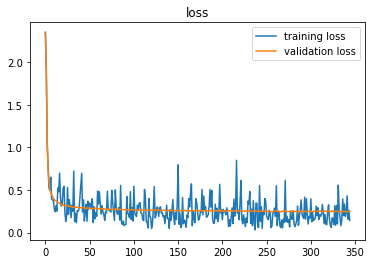

Plotting metrics...


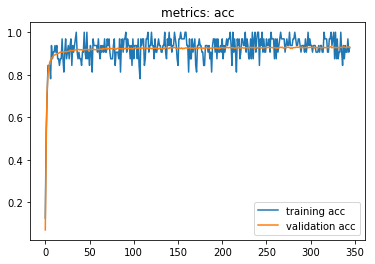

train {'acc': 0.93685454}
test {'acc': 0.9244}

{2: [{'acc': 0.9199}, {'acc': 0.8203}, {'acc': 0.9259}], 3: [{'acc': 0.9173}, {'acc': 0.728}, {'acc': 0.9261}], 5: [{'acc': 0.9222}, {'acc': 0.6002}, {'acc': 0.9239}], 10: [{'acc': 0.9214}, {'acc': 0.7671}, {'acc': 0.9259}], 20: [{'acc': 0.9221}, {'acc': 0.8544}, {'acc': 0.9283}], 30: [{'acc': 0.9255}, {'acc': 0.7541}, {'acc': 0.9291}], 40: [{'acc': 0.9221}, {'acc': 0.8073}, {'acc': 0.9244}]}


In [12]:

temperatures = [2,3,5,10,20,30,40]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    for coef_softloss in [1, temperature**2, 1/(temperature**2)]:
        print('Training student with temperature =',temperature,', coef =',coef_softloss,'.')
        # build network architecture
        student = build_small_model(input_dims, output_dims, session, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss# * temperature**2
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=32
            ,n_epochs=20
            ,display_steps=100)
        # show result
        print('Student performance with temperature =',temperature,', coef =',coef_softloss,'.')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
        gc.collect()
print(test_metrics)

In [13]:
test_metrics

{2: [{'acc': 0.9199}, {'acc': 0.8203}, {'acc': 0.9259}],
 3: [{'acc': 0.9173}, {'acc': 0.728}, {'acc': 0.9261}],
 5: [{'acc': 0.9222}, {'acc': 0.6002}, {'acc': 0.9239}],
 10: [{'acc': 0.9214}, {'acc': 0.7671}, {'acc': 0.9259}],
 20: [{'acc': 0.9221}, {'acc': 0.8544}, {'acc': 0.9283}],
 30: [{'acc': 0.9255}, {'acc': 0.7541}, {'acc': 0.9291}],
 40: [{'acc': 0.9221}, {'acc': 0.8073}, {'acc': 0.9244}]}

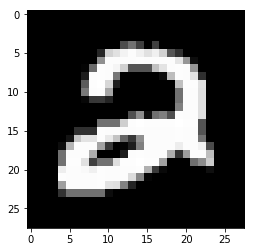

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[0.000e+00 0.000e+00 9.994e-01 4.000e-04 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 2.000e-04 0.000e+00]]
[[0.1088 0.0695 0.1395 0.1147 0.0888 0.0953 0.0944 0.0797 0.1126 0.0966]]


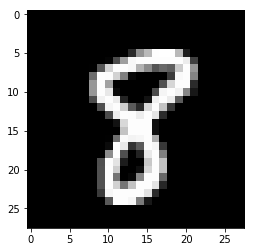

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[0.000e+00 0.000e+00 2.000e-04 1.400e-03 0.000e+00 2.100e-03 0.000e+00
  0.000e+00 9.962e-01 1.000e-04]]
[[0.0839 0.087  0.1048 0.1105 0.0922 0.1115 0.0858 0.0908 0.1301 0.1033]]


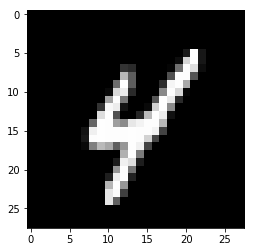

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 9.978e-01 1.000e-04 6.000e-04
  0.000e+00 6.000e-04 9.000e-04]]
[[0.0845 0.0845 0.0958 0.0901 0.1282 0.1017 0.1064 0.0947 0.1065 0.1076]]


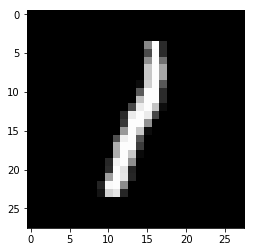

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0.000e+00 9.885e-01 8.700e-03 9.000e-04 0.000e+00 4.000e-04 1.000e-04
  8.000e-04 5.000e-04 0.000e+00]]
[[0.0942 0.1213 0.1077 0.1018 0.0879 0.0997 0.0968 0.1016 0.1006 0.0884]]


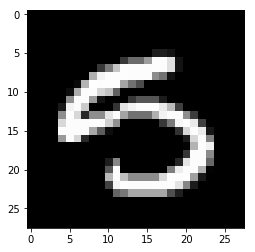

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[4.000e-02 0.000e+00 1.000e-04 2.000e-03 0.000e+00 9.536e-01 1.700e-03
  0.000e+00 1.700e-03 9.000e-04]]
[[0.1107 0.0892 0.0946 0.1027 0.0876 0.1198 0.1023 0.0902 0.1022 0.1007]]


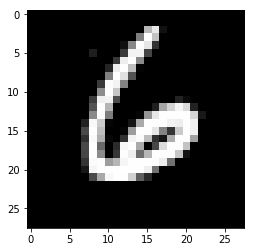

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[[0.000e+00 0.000e+00 7.000e-04 0.000e+00 1.000e-04 0.000e+00 9.991e-01
  0.000e+00 1.000e-04 0.000e+00]]
[[0.095  0.0864 0.1107 0.0969 0.1036 0.1024 0.1325 0.0705 0.1057 0.0963]]


In [14]:
# plot and show sample # deprecated
if try_cls2 and True:
    n_samples = 6
    round_show = 4
    n_data = X_test.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_test[[indices[i]]]
        label = y_test[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = student.predict(sample)
        pred_t = student.predict_softened(sample, temperature=temperature)
        print(label)
        print(np.round(pred,round_show))
        print(np.round(pred_t,round_show))
#         print(np.round(pred_t2,round_show))
        #     student.predict()

In [15]:
# close_session(session)